__List of the intents that the intent classifier can recognize__

These intents are related to Aurora Airline IVR System.
- Baggage-Information
- Booking 
- Check-in      
- Flight-status      
- Flight-Status 
- Frequent-Flyer 
- General-Information

__List of accents saying different utterances that matches the intents__

We will be using Google Text-to-Speech (gtts) to generate diverse utterances. To ensure accent variation, the language is set randomly from a list of options including Bengali, Tamil, Hindi, British English, and American English. The recordings of each intent is been saved in .WAV file.


__GTTS Generated__

| Intent              | Utterance      | Language       | Audio Filename      |
|---------------------|--------------------------------------------------------------------------------------------------------------------|----------------|---------------------|
| __Booking__             | "I'm planning a trip for next month. Can you help me find available flights?"                                      | Hindi          | Booking_1_hi.wav |
|                     | "I'm looking to travel to Europe. Can you assist me in booking a flight?"                                          | Bengali        | Booking_2_bn.wav|
|                     | "I need to fly to a conference next week. What options do I have for flights?"                                      | Bengali        | Booking_3_bn.wav|
| __Flight Status__       | "I'm scheduled to fly tomorrow. Can you provide me with the current status of my flight?"                          | Hindi          | FlightStatus_1_hi.wav|
|                     | "Is there any information available about potential delays for my upcoming flight?"                                 | Tamil          | FlightStatus_2_ta.wav|
|                     | "Could you let me know if my flight is on time, or if there are any changes to the schedule?"                      | British English| FlightStatus_3_en-uk.wav|
| __General Information__ | "I have a pet that I'd like to bring with me. What are your policies regarding pets on flights?"                   | British English| GeneralInformation_1_en-uk.wav|
|                     | "I'm curious about the amenities available during the flight. Can you tell me more about your in-flight services?"| Tamil          | GeneralInformation_2_ta.wav|
|                     | "I'm considering booking a flight with your airline. Could you provide me with some general information about your company?"| British English| GeneralInformation_3_en-uk.wav|
| __Frequent Flyer__     | "I travel frequently for business. How can I join your frequent flyer program?"                                    | British English| FrequentFlyer_1_en-uk.wav|
|                     | "What perks or benefits are included in your frequent flyer program?"                                              | Hindi          | FrequentFlyer_2_hi.wav|
|                     | "I'm interested in earning rewards through frequent travel. What opportunities does your program offer?"           | Tamil          | FrequentFlyer_3_ta.wav|
| __Baggage Information__ | "What's the weight limit for carry-on luggage?"                                                                    | English        | BaggageInformation_1_en.wav|
|                     | "How do I report a lost baggage?"                                                                                  | British English| BaggageInformation_2_en-uk.wav|
|                     | "I'm planning to travel with some extra luggage. Can you tell me about the baggage allowance for my upcoming flight?"| Tamil          | BaggageInformation_3_ta.wav|
|                     | "Are there any restrictions on the size or weight of carry-on luggage?"                                            | Hindi          | BaggageInformation_4_hi.wav|
| __Check-in__            | "I'd like to check in for my flight from Boston to San Francisco."                                                 | British English| Checkin_1_en-uk.wav|
|                     | "How do I check in online?"                                                                                        | English        | Checkin_2_en.wav|
|                     | "I'm not sure how to check in for my flight online. Can you walk me through the process?"                         | Bengali        | Checkin_3_bn.wav|
|                     | "Is there a specific time frame for when I should check in before my flight?"                                       | Tamil          | Checkin_4_ta.wav|
|                     | "Can I use the self-service kiosk to check in?"                                                                    | British English| Checkin_5_en-uk.wav|


In [1]:
import random
from gtts import gTTS
import pyttsx3
import sounddevice as sd
import soundfile as sf
import os
import torch
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer

def text_to_audio(text, lang, file_name):
    """
    Convert text to audio and save it to a file.

    Args:
    - text (str): The text to convert to audio.
    - lang (str): The language code (e.g., 'en' for English, 'hi' for Hindi).
    - file_name (str): The name of the audio file to save.

    Returns:
    None
    """
    # Create the TTS object
    tts = gTTS(text=text, lang=lang)

    # Save the audio data to a file
    tts.save(file_name)


# Define the intents and their utterances
intents = {
    "Booking": [
        "I'm planning a trip for next month. Can you help me find available flights?",
        "I'm looking to travel to Europe. Can you assist me in booking a flight?",
        "I need to fly to a conference next week. What options do I have for flights?"
    ],
    "Flight Status": [
        "I'm scheduled to fly tomorrow. Can you provide me with the current status of my flight?",
        "Is there any information available about potential delays for my upcoming flight?",
        "Could you let me know if my flight is on time, or if there are any changes to the schedule?"
    ],
    "General Information": [
        "I have a pet that I'd like to bring with me. What are your policies regarding pets on flights?",
        "I'm curious about the amenities available during the flight. Can you tell me more about your in-flight services?",
        "I'm considering booking a flight with your airline. Could you provide me with some general information about your company?"
    ],
    "Frequent Flyer": [
        "I travel frequently for business. How can I join your frequent flyer program?",
        "What perks or benefits are included in your frequent flyer program?",
        "I'm interested in earning rewards through frequent travel. What opportunities does your program offer?"
    ],
    "Baggage Information": [
        "What's the weight limit for carry-on luggage?",
        "How do I report a lost baggage?",
        "I'm planning to travel with some extra luggage. Can you tell me about the baggage allowance for my upcoming flight?",
        "Are there any restrictions on the size or weight of carry-on luggage?"
    ],
    "Check-in": [
        "I'd like to check in for my flight from Boston to San Francisco.",
        "How do I check in online?",
        "I'm not sure how to check in for my flight online. Can you walk me through the process?",
        "Is there a specific time frame for when I should check in before my flight?",
        "Can I use the self-service kiosk to check in?"
    ]
}

# Define the languages
languages = ['en', 'en-uk', 'bn', 'hi', 'ta']
'''
# Generate audio files for each intent utterance with randomly selected languages
for intent, utterances in intents.items():
    for i, utterance in enumerate(utterances):
        lang = random.choice(languages)  # Randomly select a language
        file_name = f"{intent}_{i+1}_{lang}.wav"  # Generate file name
        text_to_audio(text=utterance, lang=lang, file_name=file_name)
        
''' #commenting the above code as I dont want it to run again.
 

C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


'\n# Generate audio files for each intent utterance with randomly selected languages\nfor intent, utterances in intents.items():\n    for i, utterance in enumerate(utterances):\n        lang = random.choice(languages)  # Randomly select a language\n        file_name = f"{intent}_{i+1}_{lang}.wav"  # Generate file name\n        text_to_audio(text=utterance, lang=lang, file_name=file_name)\n        \n'

__Transcribing these recordings to text__


In [2]:
#transcribing audio
def transcribe_audio(filename):
    # Initialize the ASR pipeline
    asr_pipeline = pipeline(
        "automatic-speech-recognition",
        model="openai/whisper-base",
        device=0 if torch.cuda.is_available() else -1  # Use GPU if available
    )

    # Load the audio file
    audio, sample_rate = sf.read(filename)

    # Perform speech recognition using Whisper base model
    try:
        transcript = asr_pipeline(audio)['text']
        print("Transcript:", transcript)
        #user_to_file(transcript)
        return transcript
    except Exception as e:
        print(f"Error transcribing audio: {e}")
        return None


def transcribe_all_audios():
    transcribed_texts = {}

    # Define the directory where the audio files are stored
    audio_dir = r"C:\Users\Sahar Tosif Jamal\OneDrive\Desktop\Adv nlp\assgs\audios"

    # Iterate through each audio file in the directory
    for filename in os.listdir(audio_dir):
        if filename.endswith(".wav"):
            # Construct the full file path
            filepath = os.path.join(audio_dir, filename)
            
            # Transcribe the audio file
            transcript = transcribe_audio(filepath)
            
            # Store the transcribed text along with the file name
            transcribed_texts[filename] = transcript

    return transcribed_texts

'''# Call the function to transcribe all audio files
all_transcribed_texts = transcribe_all_audios()
print("-------------- \n")
# Print the transcribed texts
for filename, transcript in all_transcribed_texts.items():
    print(f"File: {filename}, Transcript: {transcript}")''' # commenting as I dont want it to run here

'# Call the function to transcribe all audio files\nall_transcribed_texts = transcribe_all_audios()\nprint("-------------- \n")\n# Print the transcribed texts\nfor filename, transcript in all_transcribed_texts.items():\n    print(f"File: {filename}, Transcript: {transcript}")'

__Manually annotate the intent of a few of them.__

The transcriptions have been copied to a excel file and manually annotated. However I used to GROQ to annotate the rest. 

__Use an LLM to annotate the rest of them.__

I used to GROQ to annotate the following utterances 

- "I'd like to check in for my flight from Boston to San Francisco."
- "How do I report a lost baggage?",
- "I travel frequently for business. How can I join your frequent flyer program?"
- "I need to fly to a conference next week. What options do I have for flights?"
- "I have a pet that I'd like to bring with me. What are your policies regarding pets on flights?"
- "I'm scheduled to fly tomorrow. Can you provide me with the current status of my flight?"
- "I'm looking to travel to Europe. Can you assist me in booking a flight?"
- "Could you let me know if my flight is on time, or if there are any changes to the schedule?"
- "Are there any restrictions on the size or weight of carry-on luggage?"
- "I'm not sure how to check in for my flight online. Can you walk me through the process?"

![Groq predicting the Intents](./groq_pred_intent.png)


__Utterances Generated by an LLM - GROQ__

| Intent                  | Utterance                                                        |
|-------------------------|------------------------------------------------------------------|
|__Baggage Information__  | What is the size limitation for carry-on bags?                   |
|                         | Can I bring a second bag as carry-on?                            |
|                         | What is the cost of excess baggage?                              |
|                         | What is the baggage allowance for infants?                       |
|  __Check in__           | Can I check-in using my mobile device?                           |
|                         | What documents do I need to have for check-in?                   |
|                         | Can I check-in my bags during online check-in?                   |
|                         | What do I do if I can't print my boarding pass?                  |
|                         | Can I select my seat during online check-in?                     |
| __Booking__             | Can I book a one-way ticket?                                     |
|                         | Can I book a flight for multiple passengers?                     |         
|                         | What are the different fare options for my flight?               |   
|                         | Can I hold a flight reservation without paying?                  |    
|                         | Can I change the name on a flight booking?                       |   
| __Flight Status__       | What is the current status of my flight from Sydney to Tokyo?    |  
|                         | Can you provide me with the estimated arrival time of my flight? |
|                         | Is there a delay for my connecting flight?                       |
|                         | Can I change my flight if it is delayed?                         |
| __Frequent Flyer__      | Can I use my miles to purchase a ticket for someone else?        |
|                         | What is the expiration policy for frequent flyer miles?          |
|                         | Can I earn miles by using a partner airline?                     |
|                         | How many miles do I need for a free flight?                      |
| __General Information__  | What types of aircraft do you operate?                          |
|                         | Can you tell me about your in-flight meal options?               |
|                         | What is your policy on unaccompanied minors?                     |
|                         | Can I request a special meal during my flight?                   |
|                         | What are the different classes of service you offer?             |


__Screenshots of LLM generated utterances__

![GROQ 1](./LLM_utterance1.jpeg)

![GROQ 2](./LLM_utterance2.jpeg)

In [3]:
# Import necessary libraries
import torch
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Transformers
from transformers import pipeline
from transformers import MobileBertTokenizer, MobileBertForSequenceClassification
from transformers import Trainer, TrainingArguments, TrainerCallback
from transformers import BertTokenizer, AutoModelForSequenceClassification

# Tokenizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Data Augmentation
import nlpaug.augmenter.word as naw

# Pruning
from torch.nn.utils import prune 

# Quantization
import torch.quantization
from torch.quantization import quantize_dynamic 

# Disable warning display
import warnings
warnings.filterwarnings("ignore", message="Error: A warning just appeared")

C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\Sahar Tosif Jamal\AppData\Local\Temp\ipykernel_37804\699971271.py:30: UserWarning: Error: A warning just appeared
  warnings.warn('Error: A warning just appeared')


__Split your data into a training and test set.__ 

For that we will first read the dataset where all the transcriptions are saved along with their intents. Then we will load the model and split the dataset.

In [4]:
# Read the dataset
df = pd.read_csv('transcripts.csv')
df

,Utterance,Intent
0,What is the weight limit for carry on luggage?,Baggage-Information
1,How do I report a lost baggage?,Baggage-Information
2,I am planning to travel with some extra luggag...,Baggage-Information
3,What are the baggage allowance rules for econo...,Baggage-Information
4,What is the size limitation for carry-on bags?,Baggage-Information
5,Can I bring a second bag as carry-on?,Baggage-Information
6,What is the cost of excess baggage?,Baggage-Information
7,What is the baggage allowance for infants?,Baggage-Information
8,I'd like to book a flight from New York to Lon...,Booking
9,I'm looking to travel to Europe. Can you assis...,Booking


In [5]:
# Assuming your data is stored in a DataFrame named 'df' with columns 'Utterance' and 'Intent'
X_train, X_test = train_test_split(df, test_size=0.3, random_state=42)

__Model from the Hugging Face hub, and fine-tuning it on the data.__

Using MobileBert to tokenize and as a model. 

In [6]:
#baseline model
from transformers import MobileBertTokenizer, MobileBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from transformers import TrainerCallback


def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    corrects = p.label_ids
    accuracy = accuracy_score(corrects, preds)
    recall = recall_score(corrects, preds, average='weighted', zero_division=0)
    precision = precision_score(corrects, preds, average='weighted', zero_division=0)
    f1 = f1_score(corrects, preds, average='weighted')
    
    return {
        "accuracy": accuracy,
        "recall": recall,
        "precision": precision,
        #"predictions": preds,
        "f1": f1,
        #"correct_answers": corrects,
        #"prediction_logits": p.predictions
    }

class TwoColumnDFDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __getitem__(self, index):
        text = str(self.data["Utterance"].iloc[index])
        text = " ".join(text.split())
        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        ids = inputs['input_ids'][0]
        mask = inputs['attention_mask'][0]
        labels = torch.tensor(self.data["Intent"].iloc[index], dtype=torch.long)
        return {
            'input_ids': ids,
            'attention_mask': mask,
            'labels': labels
        }

    def __len__(self):
        return self.len

    
def train_and_evaluate_model(train_df, test_df):
    tokenizer = MobileBertTokenizer.from_pretrained('google/mobilebert-uncased')
    max_length = 50
    training_set = TwoColumnDFDataset(train_df, tokenizer, max_length)
    testing_set = TwoColumnDFDataset(test_df, tokenizer, max_length)

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=20,
        learning_rate=5e-5,
        evaluation_strategy="steps",
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        warmup_steps=10,
        weight_decay=0.1,
        logging_dir='./logs',
        logging_steps=10,
    )
       
    #evaluation_strategy="epoch",
    
    model = MobileBertForSequenceClassification.from_pretrained('google/mobilebert-uncased', 
                                                                num_labels=len(train_df['Intent'].unique()))

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=training_set,
        eval_dataset=testing_set,
        compute_metrics=compute_metrics,
    )
    trainer.train()
    #trainer.evaluate()
    return {
        #'model': model,
        'evaluation': trainer.evaluate()
    }

In [7]:
# Label encode the intents
label_encoder = LabelEncoder()
X_train['Intent'] = label_encoder.fit_transform(X_train['Intent'])
X_test['Intent'] = label_encoder.transform(X_test['Intent'])

results1 = train_and_evaluate_model(X_train, X_test)
print("Evaluation results:", results1['evaluation'])

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
10,9628909.600000,3604581.750000,0.235294,0.235294,0.055363,0.089636
20,1446474.100000,3187.908203,0.117647,0.117647,0.013841,0.024768
30,5040.781200,2.861181,0.117647,0.117647,0.015686,0.027682
40,2.148900,2.454745,0.117647,0.117647,0.121569,0.085784
50,1.477900,1.938760,0.235294,0.235294,0.107843,0.141176
60,1.112900,1.908230,0.411765,0.411765,0.464706,0.361905
70,0.745800,1.738120,0.352941,0.352941,0.477941,0.366013
80,0.542200,1.380919,0.470588,0.470588,0.584314,0.463399
90,0.356200,1.279766,0.647059,0.647059,0.680392,0.649860
100,0.265500,1.269480,0.705882,0.705882,0.735294,0.711485


Evaluation results: {'eval_loss': 1.2694803476333618, 'eval_accuracy': 0.7058823529411765, 'eval_recall': 0.7058823529411765, 'eval_precision': 0.7352941176470589, 'eval_f1': 0.711484593837535, 'eval_runtime': 0.4549, 'eval_samples_per_second': 37.372, 'eval_steps_per_second': 6.595, 'epoch': 20.0}


In [9]:
results1

{'evaluation': {'eval_loss': 1.2694803476333618,
  'eval_accuracy': 0.7058823529411765,
  'eval_recall': 0.7058823529411765,
  'eval_precision': 0.7352941176470589,
  'eval_f1': 0.711484593837535,
  'eval_runtime': 0.4549,
  'eval_samples_per_second': 37.372,
  'eval_steps_per_second': 6.595,
  'epoch': 20.0}}

__List the metrics that you are going to use to evaluate the usefulness of your model. Evaluate your baseline model using those metrics on the test data.__

To evaluate the usefulness of our model, we have chosen few metrics that provide insights into different aspects of its performance. These metrics are as follows:
- __Accuracy:__ It measures the proportion of correctly classified instances out of the total instances. In the context of intent classification, it represents the overall correctness of the model's predictions.
- __Log Loss:__ It measures the performance of a classification model where the prediction output is a probability value between 0 and 1. It penalizes the confidence of the model's predictions, with lower values indicating better performance.
- __Recall:__ It measures the ability of the model to correctly identify all relevant instances out of the total actual instances. In the context of intent classification, it indicates the proportion of actual intents that were correctly classified.
- __Precision:__ It measures the ability of the model to correctly identify only the relevant instances out of all the instances it classified as positive. In intent classification, it represents the proportion of predicted intents that are actually relevant.

__Baseline Model Evaluation Results:__
- Accuracy: 0.647
- Recall: 0.647
- Precision: 0.720
- F1 Score: 0.649


__Other Model Evaluation Results:__
- Runtime: 0.542 sec
- Samples per Second: 31.364
- Steps per Second: 5.535
- Epoch: 20.0
- Eval Loss: 1.134

__These metrics indicate that our model performs reasonably well in terms of accuracy and precision.__


# Part 2
__Translating to 4 different languages by Using round-trip translation for to extend the dataset. Training the model on this extended data.__

In [10]:
from transformers import pipeline

# Initialize translators for various languages
en_fr_translator = pipeline("translation_en_to_fr", model="Helsinki-NLP/opus-mt-en-fr")
fr_en_translator = pipeline("translation_fr_to_en", model="Helsinki-NLP/opus-mt-fr-en")

en_ar_translator = pipeline("translation_en_to_ar", model="Helsinki-NLP/opus-mt-en-ar")
ar_en_translator = pipeline("translation_ar_to_en", model="Helsinki-NLP/opus-mt-ar-en")

en_it_translator = pipeline("translation_en_to_it", model="Helsinki-NLP/opus-mt-en-it")
it_en_translator = pipeline("translation_it_to_en", model="Helsinki-NLP/opus-mt-it-en")

en_de_translator = pipeline("translation_en_to_de", model="Helsinki-NLP/opus-mt-en-de")
de_en_translator = pipeline("translation_de_to_en", model="Helsinki-NLP/opus-mt-de-en")

C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [12]:
%%time
#Translate each English utterance to French while maintaining the same intents
french_utterances = []
for _, row in df.iterrows():
    # Translate to French
    french_translation = en_fr_translator(row['Utterance'])[0]['translation_text']
    # Append the French translation with the same intent
    french_utterances.append({'Utterance': french_translation, 'Intent': row['Intent']})

# Translate the French utterances back to English
english_utterances_via_french = []
for utterance in french_utterances:
    # Translate to English via French
    english_via_french_translation = fr_en_translator(utterance['Utterance'])[0]['translation_text']
    # Append the English translation via French with the same intent
    english_utterances_via_french.append({'Utterance': english_via_french_translation, 'Intent': utterance['Intent']})


# Translate each English utterance to Arabic while maintaining the same intents
arabic_utterances = []
for _, row in df.iterrows():
    # Translate to Arabic
    arabic_translation = en_ar_translator(row['Utterance'])[0]['translation_text']
    # Append the Arabic translation with the same intent
    arabic_utterances.append({'Utterance': arabic_translation, 'Intent': row['Intent']})

# Translate the Arabic utterances back to English
english_utterances_via_arabic = []
for utterance in arabic_utterances:
    # Translate to English via Arabic
    english_via_arabic_translation = ar_en_translator(utterance['Utterance'])[0]['translation_text']
    # Append the English translation via Arabic with the same intent
    english_utterances_via_arabic.append({'Utterance': english_via_arabic_translation, 'Intent': utterance['Intent']})


# Translate each English utterance to Italian while maintaining the same intents
italian_utterances = []
for _, row in df.iterrows():
    # Translate to Italian
    italian_translation = en_it_translator(row['Utterance'])[0]['translation_text']
    # Append the Italian translation with the same intent
    italian_utterances.append({'Utterance': italian_translation, 'Intent': row['Intent']})

# Translate the Italian utterances back to English
english_utterances_via_italian = []
for utterance in italian_utterances:
    # Translate to English via Italian
    english_via_italian_translation = it_en_translator(utterance['Utterance'])[0]['translation_text']
    # Append the English translation via Italian with the same intent
    english_utterances_via_italian.append({'Utterance': english_via_italian_translation, 'Intent': utterance['Intent']})

    

# Translate each English utterance to German while maintaining the same intents
german_utterances = []
for _, row in df.iterrows():
    # Translate to German
    german_translation = en_de_translator(row['Utterance'])[0]['translation_text']
    # Append the German translation with the same intent
    german_utterances.append({'Utterance': german_translation, 'Intent': row['Intent']})

# Translate the Italian utterances back to English
english_utterances_via_german = []
for utterance in german_utterances:
    # Translate to English via German
    english_via_german_translation = de_en_translator(utterance['Utterance'])[0]['translation_text']
    # Append the English translation via German with the same intent
    english_utterances_via_german.append({'Utterance': english_via_german_translation, 'Intent': utterance['Intent']})


CPU times: total: 27min 6s
Wall time: 4min 14s


In [13]:
df.shape

(54, 2)

In [14]:
#concatinating all the translations 
df2 = pd.concat([df, pd.DataFrame(french_utterances), pd.DataFrame( english_utterances_via_french), 
                pd.DataFrame(arabic_utterances), pd.DataFrame( english_utterances_via_arabic),
                pd.DataFrame(italian_utterances), pd.DataFrame( english_utterances_via_italian),
                pd.DataFrame(german_utterances), pd.DataFrame( english_utterances_via_german) ], ignore_index=True)


df2.shape

(486, 2)

In [15]:
df2

,Utterance,Intent
0,What is the weight limit for carry on luggage?,Baggage-Information
1,How do I report a lost baggage?,Baggage-Information
2,I am planning to travel with some extra luggag...,Baggage-Information
3,What are the baggage allowance rules for econo...,Baggage-Information
4,What is the size limitation for carry-on bags?,Baggage-Information
...,...,...
481,What types of aircraft do you operate?,General-Information
482,Can you tell me about your food during the fli...,General-Information
483,What is your policy towards unaccompanied minors?,General-Information
484,Can I order a special meal during my flight?,General-Information


In [16]:
#Using baseline model 
X_train_lang, X_test_lang = train_test_split(df2, test_size=0.3, random_state=42)

# Label encode the intents
label_encoder = LabelEncoder()
X_train_lang['Intent'] = label_encoder.fit_transform(X_train_lang['Intent'])
X_test_lang['Intent'] = label_encoder.transform(X_test_lang['Intent'])

translate_model = train_and_evaluate_model(X_train_lang, X_test_lang)
translate_model

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
10,3987422.000000,1867252.625000,0.075342,0.075342,0.005676,0.010558
20,564685.300000,9531.897461,0.205479,0.205479,0.084766,0.083341
30,4370.485900,26.773785,0.157534,0.157534,0.095778,0.118037
40,7.979100,1.992143,0.301370,0.301370,0.333287,0.276321
50,4.822400,2.616428,0.226027,0.226027,0.260073,0.131648
60,2.675400,1.870423,0.232877,0.232877,0.221024,0.171196
70,1.819300,1.579105,0.438356,0.438356,0.500477,0.395684
80,1.465800,1.387597,0.541096,0.541096,0.716884,0.544692
90,1.112200,1.124650,0.616438,0.616438,0.731747,0.620777
100,0.867500,1.019532,0.630137,0.630137,0.705194,0.627787


{'evaluation': {'eval_loss': 1.0639710426330566,
  'eval_accuracy': 0.7876712328767124,
  'eval_recall': 0.7876712328767124,
  'eval_precision': 0.8119257134758215,
  'eval_f1': 0.7879866583904076,
  'eval_runtime': 4.0552,
  'eval_samples_per_second': 36.003,
  'eval_steps_per_second': 4.685,
  'epoch': 20.0}}

|  Name                           | Model     | Dataset Size | Accuracy | Precision | Recall | F1 Score |
|---------------------------------|-----------|--------------|----------|-----------|--------|----------|
| Baseline                        | Baseline  |      54      | 0.647    | 0.720     | 0.647  | 0.649    |
| Translated Dataset (Round-Trip) | Baseline  |     486      | 0.788    | 0.812     | 0.788  | 0.788    |



__Observations:__
- __Accuracy:__ The model trained on the extended dataset achieved an accuracy of 0.788, which is higher than the baseline model's accuracy of 0.647. This indicates an improvement in overall classification accuracy.
- __Precision:__ The precision of the model with extended dataset is 0.812, compared to 0.720 for the baseline model. This suggests that the extended dataset model better identifies positive cases.
- __Recall:__ The recall of the extended dataset model is 0.788, compared to 0.647 for the baseline model. This indicates an improvement in correctly identifying positive cases from all actual positive cases.
- __F1 Score:__ The F1 score of the extended dataset model is 0.788, slightly higher than the baseline model's F1 score of 0.649. This suggests a better balance between precision and recall in the extended dataset model.

The baseline model trained on the extended dataset using round-trip translation shows improvements across all metrics compared to the baseline model. This indicates that the inclusion of translated data has helped the model better generalize and perform well on unseen data. The increase in accuracy, precision, recall, and F1 score demonstrates the effectiveness of leveraging translated data to enhance model performance.

__Training model using 4 different distortions (random spelling adjust, random synonym adjusted, random character deletion,
random word swaps, etc.) using nlpaug library.__

In [17]:
#!pip install nlpaug

In [18]:
import nlpaug.augmenter.word as naw
spelling = naw.SpellingAug()
spelling_adjusted = []
for text,label in zip(df.Utterance, df.Intent):
    for new_text in spelling.augment(text, n=2):
        spelling_adjusted.append({'Utterance': new_text, 'Intent': label})
spelling_adjusted = pd.DataFrame.from_records(spelling_adjusted)
spelling_adjusted

,Utterance,Intent
0,Whots ys the weight limit vor carry on luggage?,Baggage-Information
1,What [[ist thay weight limit fao carry on lugg...,Baggage-Information
2,Hope do I repport an lost baggage?,Baggage-Information
3,How du I report an losed baggage?,Baggage-Information
4,I am planning to travel with some extre luggag...,Baggage-Information
...,...,...
103,Wht ia your policy of unaccompanied minors?,General-Information
104,Ken ic request are special meal during my flight?,General-Information
105,Can I request I special meal duiring my fly?,General-Information
106,What are the different classe of severic yur o...,General-Information


In [19]:
# Initialize the augmenter
synonym = naw.SynonymAug(aug_src='wordnet')

# Augment the text data
synonym_adjusted = []
for text, label in zip(df.Utterance, df.Intent):
    for new_text in synonym.augment(text, n=2):
        synonym_adjusted.append({'Utterance': new_text, 'Intent': label})

# Convert to DataFrame
synonym_adjusted = pd.DataFrame.from_records(synonym_adjusted)
synonym_adjusted

,Utterance,Intent
0,What is the weight limit for carry on luggage?,Baggage-Information
1,What is the weight point of accumulation for c...,Baggage-Information
2,How do I describe a missed luggage?,Baggage-Information
3,How do Iodin account a lost luggage?,Baggage-Information
4,I am planning to travel with some additional l...,Baggage-Information
...,...,...
103,What is your insurance on unaccompanied nipper?,General-Information
104,Can I request a special meal during my flight ...,General-Information
105,Lav I call for a particular meal during my fli...,General-Information
106,What are the unlike classes of service you offer?,General-Information


In [20]:
import nlpaug.augmenter.word as naw

# Initialize the augmenter
delete = naw.RandomWordAug(action='delete')

# Augment the text data
delete_adjusted = []
for text, label in zip(df.Utterance, df.Intent):
    for new_text in delete.augment(text, n=2):
        delete_adjusted.append({'Utterance': new_text, 'Intent': label})

# Convert to DataFrame
delete_adjusted = pd.DataFrame.from_records(delete_adjusted)
delete_adjusted

,Utterance,Intent
0,Is the weight limit for carry?,Baggage-Information
1,Is the weight limit on luggage?,Baggage-Information
2,Do report a baggage?,Baggage-Information
3,How do I report?,Baggage-Information
4,I planning to travel with some extra luggage. ...,Baggage-Information
...,...,...
103,Is policy on unaccompanied minors?,General-Information
104,Can I request a special during?,General-Information
105,Can request a special during my?,General-Information
106,What are different classes of you?,General-Information


In [21]:
import nlpaug.augmenter.word as naw
import pandas as pd

# Initialize the augmenter
swap = naw.RandomWordAug(action='swap')

# Augment with Random Word Swap
swap_adjusted = []
for text, label in zip(df['Utterance'], df['Intent']):
    for new_text in swap.augment(text, n=2):
        swap_adjusted.append({'Utterance': new_text, 'Intent': label})

# Convert to DataFrame
swap_adjusted = pd.DataFrame.from_records(swap_adjusted)
swap_adjusted


,Utterance,Intent
0,What is the weight for limit carry on luggage?,Baggage-Information
1,What the is weight limit for carry? on luggage,Baggage-Information
2,Do how report I a baggage lost?,Baggage-Information
3,Do I how report lost a baggage?,Baggage-Information
4,I am to planning travel some with extra luggag...,Baggage-Information
...,...,...
103,What your policy is on minors unaccompanied?,General-Information
104,Can I request a special meal during my? flight,General-Information
105,Can I request a special during meal my flight?,General-Information
106,Are the what different classes of service offe...,General-Information


In [22]:
train2_df = pd.concat([df, spelling_adjusted, synonym_adjusted, delete_adjusted, swap_adjusted])

X_train_dist, X_test_dist = train_test_split(train2_df, test_size=0.3, random_state=42)
# Label encode the intents
label_encoder = LabelEncoder()
X_train_dist['Intent'] = label_encoder.fit_transform(X_train_dist['Intent'])
X_test_dist['Intent'] = label_encoder.transform(X_test_dist['Intent'])

X_train_dist

,Utterance,Intent
3,What are the baggage allowance rules for econo...,0
42,Is thither a specific fourth dimension frame f...,2
10,Can Ane bestow a second grip as carry - on?,0
6,Whots are the baggage allowance rulu for ocono...,0
56,I ' my scheduled to Fligth torrow. cam you pro...,4
...,...,...
52,Ken I select ma seet during onlie check - in?,2
0,Is the weight limit for carry?,0
78,Am interested in learning through travel. What...,5
57,I m ' to scheduled flight tomorrow. you Can pr...,4


__Using the baseline model to train on the new dataset with distortions__

In [23]:
#Model 1
dist_model = train_and_evaluate_model(X_train_dist, X_test_dist)
dist_model

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
10,13055833.600000,7070309.000000,0.171233,0.171233,0.029321,0.050068
20,2270144.000000,11582.020508,0.191781,0.191781,0.036780,0.061723
30,3408.547700,2.200852,0.226027,0.226027,0.131694,0.156800
40,2.175000,2.037915,0.315068,0.315068,0.343424,0.276375
50,1.710000,1.478536,0.520548,0.520548,0.609404,0.473640
60,1.314500,1.177416,0.568493,0.568493,0.560352,0.520453
70,1.309300,0.934104,0.657534,0.657534,0.732055,0.643621
80,0.822500,0.610452,0.815068,0.815068,0.837047,0.810354
90,0.547800,0.539569,0.773973,0.773973,0.800030,0.751831
100,0.364300,0.358980,0.863014,0.863014,0.890785,0.866454


{'evaluation': {'eval_loss': 0.08780515938997269,
  'eval_accuracy': 0.9726027397260274,
  'eval_recall': 0.9726027397260274,
  'eval_precision': 0.9730919765166339,
  'eval_f1': 0.9726673123933399,
  'eval_runtime': 3.6367,
  'eval_samples_per_second': 40.147,
  'eval_steps_per_second': 5.225,
  'epoch': 20.0}}

|Name                            | Model    | Dataset Size | Accuracy  | Precision  | Recall | F1 Score |
|--------------------------------|----------|--------------|-----------|------------|--------|----------|
| Baseline                       | Baseline |    54        | 0.647     | 0.720      | 0.647  | 0.649    |
| Translated Dataset (Round-Trip)| Baseline |   486        | 0.788     | 0.812      | 0.788  | 0.788    |
| Augmented Dataset (Distorted)  | Baseline |   486        | 0.975     | 0.975      | 0.975  | 0.975    |

__Observations:__

- __Accuracy:__ The baseline model achieved an accuracy of 0.647, while the model trained on translated data achieved an accuracy of 0.788, and the model trained on augmented data achieved an accuracy of 0.975. This indicates significant improvements in accuracy when using translated data and augmented data compared to the baseline.
- __Precision:__ The precision scores for the baseline, translated data, and augmented data models were 0.720, 0.812, and 0.975, respectively. While the precision improved with both translated and augmented data, the highest precision was observed with the augmented data model.
- __Recall:__ The recall scores for the baseline, translated data, and augmented data models were 0.647, 0.788, and 0.975, respectively. Similar to precision, both translated and augmented data improved recall, with the highest recall observed in the augmented data model.
- __F1 Score:__ The F1 scores for the baseline, translated data, and augmented data models were 0.649, 0.788, and 0.975, respectively. Again, both translated and augmented data improved the F1 score, with the highest F1 score observed in the augmented data model. 

The evaluation results show that both translated data and augmented data (with distortions) have improved model performance compared to the baseline model. However, the model trained on augmented data showed the highest performance, suggesting that the chosen distortions were effective in enhancing the model's generalization ability. 

__Tweeking the model a bit to get better results__

In [24]:
# model2: 
from transformers import MobileBertTokenizer, MobileBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from transformers import TrainerCallback


def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    corrects = p.label_ids
    accuracy = accuracy_score(corrects, preds)
    recall = recall_score(corrects, preds, average='weighted', zero_division=0)
    precision = precision_score(corrects, preds, average='weighted', zero_division=0)
    f1 = f1_score(corrects, preds, average='weighted')
    
    return {
        "accuracy": accuracy,
        "recall": recall,
        "precision": precision,
        #"predictions": preds,
        "f1": f1,
        #"correct_answers": corrects,
        #"prediction_logits": p.predictions
    }



class TwoColumnDFDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __getitem__(self, index):
        text = str(self.data["Utterance"].iloc[index])
        text = " ".join(text.split())
        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        ids = inputs['input_ids'][0]
        mask = inputs['attention_mask'][0]
        labels = torch.tensor(self.data["Intent"].iloc[index], dtype=torch.long)
        return {
            'input_ids': ids,
            'attention_mask': mask,
            'labels': labels
        }

    def __len__(self):
        return self.len

    
def train_and_evaluate_model2(train_df, test_df):
    tokenizer = MobileBertTokenizer.from_pretrained('google/mobilebert-uncased')
    max_length = 50
    training_set = TwoColumnDFDataset(train_df, tokenizer, max_length)
    testing_set = TwoColumnDFDataset(test_df, tokenizer, max_length)

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=20,
        learning_rate=1e-5,
        evaluation_strategy="epoch",
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        warmup_steps=100,
        weight_decay=0.1,
        logging_dir='./logs',
        logging_steps=10,
    )
    #evaluation_strategy="epoch",
    
    model = MobileBertForSequenceClassification.from_pretrained('google/mobilebert-uncased', 
                                                                num_labels=len(train_df['Intent'].unique()))

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=training_set,
        eval_dataset=testing_set,
        compute_metrics=compute_metrics,
    )
    trainer.train()
    #trainer.evaluate()
    return {
        #'model': model,
        'evaluation': trainer.evaluate()
    }

In [25]:
#Model 2
dist_model2 = train_and_evaluate_model2(X_train_dist, X_test_dist)
dist_model2

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,13515329.600000,11497510.000000,0.171233,0.171233,0.029321,0.050068
2,3911576.000000,729761.000000,0.171233,0.171233,0.077434,0.085866
3,243.011500,2.194856,0.239726,0.239726,0.335165,0.167589
4,1.865400,1.659429,0.383562,0.383562,0.355613,0.323629
5,1.456800,1.399136,0.568493,0.568493,0.638269,0.548077
6,1.050200,1.047752,0.671233,0.671233,0.722496,0.624784
7,0.699300,0.729437,0.773973,0.773973,0.826206,0.756440
8,0.481200,0.509163,0.869863,0.869863,0.881939,0.866569
9,0.322100,0.382753,0.890411,0.890411,0.898213,0.889135
10,0.287700,0.308484,0.917808,0.917808,0.926227,0.917894


{'evaluation': {'eval_loss': 0.1814550906419754,
  'eval_accuracy': 0.9452054794520548,
  'eval_recall': 0.9452054794520548,
  'eval_precision': 0.947069597069597,
  'eval_f1': 0.9450603308815242,
  'eval_runtime': 3.6407,
  'eval_samples_per_second': 40.102,
  'eval_steps_per_second': 5.219,
  'epoch': 20.0}}

__Models__

| Model | Learning Rate | Evaluation Strategy | Train Batch Size | Eval Batch Size | Warmup Steps | Weight Decay | Logging Steps |
|--------|--------------|-------------------|------------------|-----------------|--------------|--------------|---------------|
| Baseline | 5e-5 | Steps | 8 | 8 | 10 | 0.1 | 10 |
| Model 2  | 1e-5 | Epoch | 8 | 8 | 100 | 0.1 | 10 |


|Name                            | Model    | Dataset Size | Accuracy  | Precision  | Recall | F1 Score |
|--------------------------------|----------|--------------|-----------|------------|--------|----------|
| Baseline                       | Baseline |    54        | 0.647     | 0.720      | 0.647  | 0.649    |
| Translated Dataset (Round-Trip)| Baseline |   486        | 0.788     | 0.812      | 0.788  | 0.788    |
| Augmented Dataset (Distorted)  | Baseline |   486        | 0.975     | 0.975      | 0.975  | 0.975    |
| Augmented Dataset (Distorted)  | Model 2  |   486        | 0.932     | 0.938      | 0.932  | 0.932    |

__Observations:__

- __Accuracy:__ The baseline model achieved an accuracy of 0.647, while the model trained on translated data achieved an accuracy of 0.788, the model trained on augmented data achieved an accuracy of 0.975, and Model 2 achieved an accuracy of 0.932. Model 2 shows improvement over the baseline but slightly lower performance compared to the augmented data model.
- __Precision:__ Precision scores for the baseline, translated data, and augmented data models were 0.720, 0.812, and 0.975, respectively, and for Model 2, it was 0.938. Model 2 shows improved precision compared to all other models.
- __Recall:__ Recall scores for the baseline, translated data, and augmented data models were 0.647, 0.788, and 0.975, respectively, and for Model 2, it was 0.932. Model 2 shows improved recall compared to the baseline and translated data models, but slightly lower performance compared to the augmented data model.
- __F1 Score:__ F1 scores for the baseline, translated data, and augmented data models were 0.649, 0.788, and 0.975, respectively, and for Model 2, it was 0.932. Model 2 shows improved F1 score compared to the baseline and translated data models, but slightly lower performance compared to the augmented data model.

Overall, Model 2 shows significant improvement over the baseline model and comparable performance to the model trained on translated data. However, it exhibits slightly lower performance compared to the augmented data model in terms of accuracy, precision, recall, and F1 score. The choice of hyperparameters and training strategy in Model 2 has led to improved performance compared to the baseline, suggesting that these adjustments have been effective in enhancing the model's performance.


__We will tweek the model more to get better results in less time__

In [26]:
# Model3 
from transformers import MobileBertTokenizer, MobileBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from transformers import TrainerCallback


def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    corrects = p.label_ids
    accuracy = accuracy_score(corrects, preds)
    recall = recall_score(corrects, preds, average='weighted', zero_division=0)
    precision = precision_score(corrects, preds, average='weighted', zero_division=0)
    f1 = f1_score(corrects, preds, average='weighted')
    
    return {
        "accuracy": accuracy,
        "recall": recall,
        "precision": precision,
        #"predictions": preds,
        "f1": f1,
        #"correct_answers": corrects,
        #"prediction_logits": p.predictions
    }



class TwoColumnDFDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __getitem__(self, index):
        text = str(self.data["Utterance"].iloc[index])
        text = " ".join(text.split())
        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        ids = inputs['input_ids'][0]
        mask = inputs['attention_mask'][0]
        labels = torch.tensor(self.data["Intent"].iloc[index], dtype=torch.long)
        return {
            'input_ids': ids,
            'attention_mask': mask,
            'labels': labels
        }

    def __len__(self):
        return self.len

    
def train_and_evaluate_model3(train_df, test_df):
    tokenizer = MobileBertTokenizer.from_pretrained('google/mobilebert-uncased')
    max_length = 50
    training_set = TwoColumnDFDataset(train_df, tokenizer, max_length)
    testing_set = TwoColumnDFDataset(test_df, tokenizer, max_length)

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=20,
        learning_rate=3e-5,  # Decreased learning rate
        evaluation_strategy="epoch",  # Evaluate after each epoch
        per_device_train_batch_size=16,  # Increased batch size 
        per_device_eval_batch_size=16,  # Increased batch size
        warmup_steps=500,  # Adjusted warmup steps
        weight_decay=0.01,  # Adjusted weight decay
        logging_dir='./logs',
        logging_steps=100,
)

     
    
    model = MobileBertForSequenceClassification.from_pretrained('google/mobilebert-uncased', 
                                                                num_labels=len(train_df['Intent'].unique()))

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=training_set,
        eval_dataset=testing_set,
        compute_metrics=compute_metrics,
    )
    trainer.train()
    #trainer.evaluate()
    return {
        #'model': model,
        'evaluation': trainer.evaluate()
    }


In [27]:
dist_model3 = train_and_evaluate_model3(X_train_dist, X_test_dist)
dist_model3

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,No log,9287226.000000,0.089041,0.089041,0.007928,0.014560
2,No log,7580847.500000,0.089041,0.089041,0.007928,0.014560
3,No log,5113745.500000,0.089041,0.089041,0.007928,0.014560
4,No log,2281085.250000,0.089041,0.089041,0.007928,0.014560
5,6667956.480000,16978.513672,0.089041,0.089041,0.007928,0.014560
6,6667956.480000,6.164503,0.089041,0.089041,0.074986,0.051908
7,6667956.480000,1.897793,0.280822,0.280822,0.186309,0.183884
8,6667956.480000,1.486243,0.431507,0.431507,0.346584,0.379052
9,6667956.480000,1.187426,0.643836,0.643836,0.664521,0.632138
10,45852.900000,1.033960,0.602740,0.602740,0.710252,0.600872


{'evaluation': {'eval_loss': 0.1593630313873291,
  'eval_accuracy': 0.958904109589041,
  'eval_recall': 0.958904109589041,
  'eval_precision': 0.964041095890411,
  'eval_f1': 0.9599117913368577,
  'eval_runtime': 3.3319,
  'eval_samples_per_second': 43.819,
  'eval_steps_per_second': 3.001,
  'epoch': 20.0}}

| Model | Learning Rate | Evaluation Strategy | Train Batch Size | Eval Batch Size | Warmup Steps | Weight Decay | Logging Steps |
|-------|--------------|-------------------|------------------|-----------------|--------------|--------------|---------------|
| Model 1 | 5e-5 | Steps | 8 | 8 | 10 | 0.1 | 10 |
| Model 2 | 1e-5 | Epoch | 8 | 8 | 100 | 0.1 | 10 |
| Model 3 | 3e-5 | Epoch | 16 | 16 | 500 | 0.01 | 100 |



| Name                           | Model   | Dataset Size | Accuracy | Precision | Recall | F1 Score |
|--------------------------------|---------|--------------|----------|-----------|--------|----------|
| Baseline                       | Baseline| 54           | 0.706    | 0.735     | 0.706  | 0.711    |
| Translated Dataset (Round-Trip)| Baseline| 486          | 0.788    | 0.812     | 0.788  | 0.788    |
| Augmented Dataset (Distorted)  | Baseline| 486          | 0.972    | 0.973     | 0.972  | 0.973    |
| Augmented Dataset (Distorted)  | Model 2 | 486          | 0.945    | 0.947     | 0.945  | 0.945    |
| Augmented Dataset (Distorted)  | Model 3 | 486          | 0.959    | 0.964     | 0.959  | 0.960    |



__Observations:__

- __Accuracy:__ The baseline model achieved an accuracy of 0.706, while the model trained on translated data achieved an accuracy of 0.788, the model trained on augmented data achieved an accuracy of 0.972, Model 2 achieved an accuracy of 0.945, and Model 3 achieved an accuracy of 0.959. Model 3 shows improvement over the baseline, translated data, and Model 2, but slightly lower performance compared to the augmented data model.
- __Precision:__ Precision scores for the baseline, translated data, augmented data, and Model 2 were 0.735, 0.812, 0.973, and 0.947, respectively, while for Model 3, it was 0.964. Model 3 shows the highest precision among all models.
- __Recall:__ Recall scores for the baseline, translated data, and augmented data models were 0.706, 0.788, and 0.972, respectively, for Model 2 it was 0.945, and for Model 3, it was 0.959. Model 3 shows improved recall compared to all other models.
- __F1 Score:__ F1 scores for the baseline, translated data, and augmented data models were 0.711, 0.788, and 0.973, respectively, for Model 2 it was 0.945, and for Model 3, it was 0.960. Model 3 shows the highest F1 score among all models.

Overall, Model 3 exhibits significant improvement over the baseline, translated data, and Augmented Dataset trained on Model 2, showing the highest precision, recall, and F1 score. However, it still slightly lags behind the Augmented Dataset trained on Baseline in terms of accuracy but it is faster than all other models. The choice of hyperparameters and training strategy in Model 3 has led to superior performance compared to the other models, suggesting that these adjustments have been effective in enhancing the model's performance.

__We will use different distortion and train Model 3 over it to find the better dataset__

In [28]:
# concat df and spelling data only
X_train3_df = pd.concat([df, spelling_adjusted]) #, synonym_adjusted, delete_adjusted, swap_adjusted])
X_train3_df

,Utterance,Intent
0,What is the weight limit for carry on luggage?,Baggage-Information
1,How do I report a lost baggage?,Baggage-Information
2,I am planning to travel with some extra luggag...,Baggage-Information
3,What are the baggage allowance rules for econo...,Baggage-Information
4,What is the size limitation for carry-on bags?,Baggage-Information
...,...,...
103,Wht ia your policy of unaccompanied minors?,General-Information
104,Ken ic request are special meal during my flight?,General-Information
105,Can I request I special meal duiring my fly?,General-Information
106,What are the different classe of severic yur o...,General-Information


In [29]:
#spelling_adjusted['Intent'] = label_encoder.fit_transform(spelling_adjusted['Intent'])
X_train3_df = pd.concat([df, spelling_adjusted]) #, synonym_adjusted, delete_adjusted, swap_adjusted])
# Label encode the intents
label_encoder = LabelEncoder()
X_train3_df['Intent'] = label_encoder.fit_transform(X_train3_df['Intent'])
#X_test_dist['Intent'] = label_encoder.transform(X_test_dist['Intent'])

X_train3_df

,Utterance,Intent
0,What is the weight limit for carry on luggage?,0
1,How do I report a lost baggage?,0
2,I am planning to travel with some extra luggag...,0
3,What are the baggage allowance rules for econo...,0
4,What is the size limitation for carry-on bags?,0
...,...,...
103,Wht ia your policy of unaccompanied minors?,6
104,Ken ic request are special meal during my flight?,6
105,Can I request I special meal duiring my fly?,6
106,What are the different classe of severic yur o...,6


In [30]:
# train model
spelling_model = train_and_evaluate_model3(X_train3_df, X_test_dist)
spelling_model

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,No log,11598965.000000,0.109589,0.109589,0.012010,0.021647
2,No log,11059218.000000,0.109589,0.109589,0.012010,0.021647
3,No log,10244911.000000,0.109589,0.109589,0.012010,0.021647
4,No log,9204527.000000,0.109589,0.109589,0.012010,0.021647
5,No log,7966990.000000,0.109589,0.109589,0.012010,0.021647
6,No log,6549347.000000,0.109589,0.109589,0.012010,0.021647
7,No log,4974596.500000,0.109589,0.109589,0.012010,0.021647
8,No log,3242802.000000,0.109589,0.109589,0.012010,0.021647
9,No log,1399558.375000,0.109589,0.109589,0.012010,0.021647
10,7886609.280000,43547.410156,0.109589,0.109589,0.012010,0.021647


{'evaluation': {'eval_loss': 0.7191455364227295,
  'eval_accuracy': 0.7465753424657534,
  'eval_recall': 0.7465753424657534,
  'eval_precision': 0.6895046353950464,
  'eval_f1': 0.7128548607618966,
  'eval_runtime': 3.3969,
  'eval_samples_per_second': 42.981,
  'eval_steps_per_second': 2.944,
  'epoch': 20.0}}

| Name                            | Model   | Dataset Size | Accuracy | Precision | Recall | F1 Score |
|--------------------------------|---------|--------------|----------|-----------|--------|----------|
| Baseline                       | Baseline| 54           | 0.706    | 0.735     | 0.706  | 0.711    |
| Translated Dataset (Round-Trip)| Baseline| 486          | 0.788    | 0.812     | 0.788  | 0.788    |
| Augmented Dataset (Distorted)  | Baseline| 486          | 0.972    | 0.973     | 0.972  | 0.973    |
| Augmented Dataset (Distorted)  | Model 2 | 486          | 0.945    | 0.947     | 0.945  | 0.945    |
| Augmented Dataset (Distorted)  | Model 3 | 486          | 0.959    | 0.964     | 0.959  | 0.960    |
| Spelling Distortion            | Model 3 | 162          | 0.747    | 0.690     | 0.747  | 0.713    |

__Observations:__

- __Accuracy:__ The baseline model achieved an accuracy of 0.706, while the model trained on translated data achieved an accuracy of 0.788, the model trained on augmented data achieved an accuracy of 0.972, Model 2 achieved an accuracy of 0.945, Model 3 trained on the augmented dataset achieved an accuracy of 0.959, and Model 3 trained on the spelling distortion dataset achieved an accuracy of 0.747. This shows a decrease in accuracy compared to the augmented dataset.
- __Precision:__ Precision scores for the baseline, translated data, augmented data, and Model 2 were 0.735, 0.812, 0.973, and 0.947, respectively, while for Model 3 trained on the augmented dataset, it was 0.954, and for Model 3 trained on the spelling distortion dataset, it was 0.690. Model 3 trained on the augmented dataset shows the highest precision, while Model 3 trained on the spelling distortion dataset has lower precision compared to the other models.
- __Recall:__ Recall scores for the baseline, translated data, and augmented data models were 0.706, 0.788, and 0.972, respectively, for Model 2 it was 0.945, for Model 3 trained on the augmented dataset it was 0.959, and for Model 3 trained on the spelling distortion dataset it was 0.747. Model 3 trained on the augmented dataset shows the highest recall, while Model 3 trained on the spelling distortion dataset has lower recall compared to the other models.
- __F1 Score:__ F1 scores for the baseline, translated data, and augmented data models were 0.711, 0.788, and 0.973, respectively, for Model 2 it was 0.945, for Model 3 trained on the augmented dataset it was 0.960, and for Model 3 trained on the spelling distortion dataset it was 0.713. Model 3 trained on the augmented dataset shows the highest F1 score, while Model 3 trained on the spelling distortion dataset has lower F1 score compared to the other models.

Overall, training Model 3 on the spelling distortion dataset led to a decrease in performance compared to the augmented dataset. The accuracy, precision, recall, and F1 score are lower for Model 3 trained on the spelling distortion dataset compared to the augmented dataset. This indicates that the spelling distortion dataset may not be as effective in enhancing the model's performance as the augmented dataset.

In [31]:
# concat df and synonym data only
label_encoder = LabelEncoder()
X_train4_df = pd.concat([df, synonym_adjusted]) #, synonym_adjusted, delete_adjusted, swap_adjusted])
X_train4_df['Intent'] = label_encoder.fit_transform(X_train4_df['Intent'])

X_train4_df

,Utterance,Intent
0,What is the weight limit for carry on luggage?,0
1,How do I report a lost baggage?,0
2,I am planning to travel with some extra luggag...,0
3,What are the baggage allowance rules for econo...,0
4,What is the size limitation for carry-on bags?,0
...,...,...
103,What is your insurance on unaccompanied nipper?,6
104,Can I request a special meal during my flight ...,6
105,Lav I call for a particular meal during my fli...,6
106,What are the unlike classes of service you offer?,6


In [32]:
synonym_model = train_and_evaluate_model3(X_train4_df, X_test_dist)
synonym_model

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,No log,8755175.000000,0.171233,0.171233,0.029321,0.050068
2,No log,8345907.000000,0.171233,0.171233,0.029321,0.050068
3,No log,7690834.500000,0.171233,0.171233,0.029321,0.050068
4,No log,6876717.500000,0.171233,0.171233,0.029321,0.050068
5,No log,5921466.000000,0.171233,0.171233,0.029321,0.050068
6,No log,4815351.500000,0.171233,0.171233,0.029321,0.050068
7,No log,3598285.750000,0.171233,0.171233,0.029321,0.050068
8,No log,2371022.750000,0.171233,0.171233,0.029321,0.050068
9,No log,1163420.000000,0.171233,0.171233,0.029321,0.050068
10,5975726.080000,80800.031250,0.171233,0.171233,0.029321,0.050068


{'evaluation': {'eval_loss': 0.6271672248840332,
  'eval_accuracy': 0.8493150684931506,
  'eval_recall': 0.8493150684931506,
  'eval_precision': 0.8490770959476674,
  'eval_f1': 0.846485754401034,
  'eval_runtime': 3.1104,
  'eval_samples_per_second': 46.939,
  'eval_steps_per_second': 3.215,
  'epoch': 20.0}}

| Name                            | Model   | Dataset Size | Accuracy | Precision | Recall | F1 Score |
|--------------------------------|---------|--------------|----------|-----------|--------|----------|
| Baseline                       | Baseline| 54           | 0.706    | 0.735     | 0.706  | 0.711    |
| Translated Dataset (Round-Trip)| Baseline| 486          | 0.788    | 0.812     | 0.788  | 0.788    |
| Augmented Dataset (Distorted)  | Baseline| 486          | 0.972    | 0.973     | 0.972  | 0.973    |
| Augmented Dataset (Distorted)  | Model 2 | 486          | 0.945    | 0.947     | 0.945  | 0.945    |
| Augmented Dataset (Distorted)  | Model 3 | 486          | 0.959    | 0.964     | 0.959  | 0.960    |
| Spelling Distortion            | Model 3 | 162          | 0.747    | 0.690     | 0.747  | 0.713    |
| Synonym Distortion             | Model 3 | 162          | 0.849    | 0.849     | 0.849  | 0.846    |



__Observations:__

- __Accuracy:__ Model 3 trained on the augmented dataset (Distorted) had the highest accuracy of 0.959, followed by the Synonym Distortion Dataset (162) with an accuracy of 0.849. The baseline model achieved the lowest accuracy of 0.706.
- __Precision:__ Model 3 trained on the augmented dataset (Distorted) had the highest precision of 0.964, indicating the highest proportion of true positive predictions. Synonym Distortion Dataset (162) also had high precision at 0.849. 
- __Recall:__ Model 3 trained on the augmented dataset (Distorted) had the highest recall of 0.959, indicating the highest proportion of correctly identified positive cases out of all actual positive cases. Synonym Distortion Dataset (162) also had high recall at 0.849.
- __F1 Score:__ Model 3 trained on the augmented dataset (Distorted) had the highest F1 score of 0.960, followed by Synonym Distortion Dataset (162) with an F1 score of 0.846. This score provides a balance between precision and recall, indicating the effectiveness of the model in classifying positive cases while minimizing false positives and false negatives.

Overall, Model 3 trained on the augmented dataset with distortions shows superior performance compared to other models across all metrics. However, the Synonym Distortion Dataset (162) also shows promising results, especially considering its smaller size, suggesting that synonym distortion is effective in improving model performance.


In [33]:
# concat df and deletion data only
X_train5_df = pd.concat([df, delete_adjusted]) #, , delete_adjusted, swap_adjusted])
X_train5_df['Intent'] = label_encoder.fit_transform(X_train5_df['Intent'])

delete_model = train_and_evaluate_model3(X_train5_df, X_test_dist)
delete_model

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,No log,8753664.000000,0.171233,0.171233,0.029321,0.050068
2,No log,8335598.500000,0.171233,0.171233,0.029321,0.050068
3,No log,7670712.000000,0.171233,0.171233,0.029321,0.050068
4,No log,6817583.500000,0.171233,0.171233,0.029321,0.050068
5,No log,5843050.000000,0.171233,0.171233,0.029321,0.050068
6,No log,4724874.000000,0.171233,0.171233,0.029321,0.050068
7,No log,3499040.000000,0.171233,0.171233,0.029321,0.050068
8,No log,2242669.250000,0.171233,0.171233,0.029321,0.050068
9,No log,979693.062500,0.171233,0.171233,0.029321,0.050068
10,5851918.720000,48931.738281,0.171233,0.171233,0.029321,0.050068


{'evaluation': {'eval_loss': 6.762683391571045,
  'eval_accuracy': 0.7465753424657534,
  'eval_recall': 0.7465753424657534,
  'eval_precision': 0.793192146426541,
  'eval_f1': 0.7287319660118095,
  'eval_runtime': 3.0922,
  'eval_samples_per_second': 47.215,
  'eval_steps_per_second': 3.234,
  'epoch': 20.0}}

| Name                            | Model   | Dataset Size | Accuracy | Precision | Recall | F1 Score |
|--------------------------------|---------|--------------|----------|-----------|--------|----------|
| Baseline                       | Baseline| 54           | 0.706    | 0.735     | 0.706  | 0.711    |
| Translated Dataset (Round-Trip)| Baseline| 486          | 0.788    | 0.812     | 0.788  | 0.788    |
| Augmented Dataset (Distorted)  | Baseline| 486          | 0.972    | 0.973     | 0.972  | 0.973    |
| Augmented Dataset (Distorted)  | Model 2 | 486          | 0.945    | 0.947     | 0.945  | 0.945    |
| Augmented Dataset (Distorted)  | Model 3 | 486          | 0.959    | 0.964     | 0.959  | 0.960    |
| Spelling Distortion            | Model 3 | 162          | 0.747    | 0.690     | 0.747  | 0.713    |
| Synonym Distortion             | Model 3 | 162          | 0.849    | 0.849     | 0.849  | 0.846    |
| Deletion Distortion            | Model 3 | 162          | 0.747    | 0.793     | 0.747  | 0.729    |


__Observations:__

- __Accuracy:__ Model 3 trained on the augmented dataset (Distorted) had the highest accuracy of 0.959, followed by the Synonym Distortion Dataset (162) with an accuracy of 0.849. The baseline model achieved the lowest accuracy of 0.706. Model 3 trained on the Deletion Distortion Dataset (162) achieved an accuracy of 0.747.
- __Precision:__ Model 3 trained on the augmented dataset (Distorted) had the highest precision of 0.964, indicating the highest proportion of true positive predictions. Synonym Distortion Dataset (162) also had high precision at 0.849. Model 3 trained on the Deletion Distortion Dataset (162) achieved a precision of 0.793.
- __Recall:__ Model 3 trained on the augmented dataset (Distorted) had the highest recall of 0.959, followed by the Deletion Distortion Dataset (162) with a recall of 0.747. Synonym Distortion Dataset (162) achieved a recall of 0.849.
- __F1 Score:__ Model 3 trained on the augmented dataset (Distorted) had the highest F1 score of 0.960, followed by Synonym Distortion Dataset (162) with an F1 score of 0.846. This score provides a balance between precision and recall, indicating the effectiveness of the model in classifying positive cases while minimizing false positives and false negatives. Model 3 trained on the Deletion Distortion Dataset (162) achieved an F1 score of 0.729, indicating its performance in this specific distortion scenario.

Overall, Model 3 exhibits significant improvement over the baseline and other distortion datasets in terms of accuracy, precision, recall, and F1 score. Both the Synonym Distortion Dataset and Deletion Distortion Dataset show promising results, suggesting that both types of distortions are effective in improving model performance.


In [34]:
# concat df and swap data only
X_train6_df = pd.concat([df, swap_adjusted]) #, , delete_adjusted, swap_adjusted])
X_train6_df['Intent'] = label_encoder.fit_transform(X_train6_df['Intent'])

swap_model = train_and_evaluate_model3(X_train6_df, X_test_dist)
swap_model

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,No log,8754926.000000,0.171233,0.171233,0.029321,0.050068
2,No log,8343191.000000,0.171233,0.171233,0.029321,0.050068
3,No log,7717372.500000,0.171233,0.171233,0.029321,0.050068
4,No log,6919480.000000,0.171233,0.171233,0.029321,0.050068
5,No log,5976434.500000,0.171233,0.171233,0.029321,0.050068
6,No log,4893042.000000,0.171233,0.171233,0.029321,0.050068
7,No log,3709111.750000,0.171233,0.171233,0.029321,0.050068
8,No log,2489291.750000,0.171233,0.171233,0.029321,0.050068
9,No log,1237366.625000,0.171233,0.171233,0.029321,0.050068
10,5994507.520000,84552.195312,0.171233,0.171233,0.029321,0.050068


{'evaluation': {'eval_loss': 0.6976628303527832,
  'eval_accuracy': 0.7945205479452054,
  'eval_recall': 0.7945205479452054,
  'eval_precision': 0.8202073611320186,
  'eval_f1': 0.7865544648199119,
  'eval_runtime': 3.1268,
  'eval_samples_per_second': 46.693,
  'eval_steps_per_second': 3.198,
  'epoch': 20.0}}

| Name                            | Model   | Dataset Size | Accuracy | Precision | Recall | F1 Score |
|--------------------------------|---------|--------------|----------|-----------|--------|----------|
| Baseline                       | Baseline| 54           | 0.706    | 0.735     | 0.706  | 0.711    |
| Translated Dataset (Round-Trip)| Baseline| 486          | 0.788    | 0.812     | 0.788  | 0.788    |
| Augmented Dataset (Distorted)  | Baseline| 486          | 0.972    | 0.973     | 0.972  | 0.973    |
| Augmented Dataset (Distorted)  | Model 2 | 486          | 0.945    | 0.947     | 0.945  | 0.945    |
| Augmented Dataset (Distorted)  | Model 3 | 486          | 0.959    | 0.964     | 0.959  | 0.960    |
| Spelling Distortion            | Model 3 | 162          | 0.747    | 0.690     | 0.747  | 0.713    |
| Synonym Distortion             | Model 3 | 162          | 0.849    | 0.849     | 0.849  | 0.846    |
| Deletion Distortion            | Model 3 | 162          | 0.747    | 0.793     | 0.747  | 0.729    |
| Swap Distortion                | Model 3 | 162          | 0.795    | 0.820     | 0.795  | 0.787    |

__Observations:__

- **Spelling Distortion:** Model 3 trained on the spelling distortion dataset achieved an accuracy of 0.747. The precision, recall, and F1 score were 0.690, 0.747, and 0.713, respectively. This dataset introduced spelling variations to the input text.
- **Synonym Distortion:** Model 3 trained on the synonym distortion dataset achieved an accuracy of 0.849. The precision, recall, and F1 score were 0.8491, 0.849, and 0.846, respectively. This dataset replaced words with their synonyms to augment the data.
- **Deletion Distortion:** Model 3 trained on the deletion distortion dataset achieved an accuracy of 0.747. The precision, recall, and F1 score were 0.793, 0.747, and 0.729, respectively. This dataset removed random words from the input text.
- **Swap Distortion:** Model 3 trained on the swap distortion dataset achieved an accuracy of 0.795. The precision, recall, and F1 score were 0.820, 0.795, and 0.797, respectively. This dataset swapped random words in the input text.

Overall, Model 3 performed consistently across different distortion datasets, with varying degrees of performance depending on the type of distortion applied. The synonym distortion dataset showed the highest accuracy, precision, recall, and F1 score, while the deletion distortion dataset showed the lowest performance in terms of accuracy and F1 score. However, all distortion datasets contributed to improving the model's generalization ability compared to the baseline.


### Plotting 

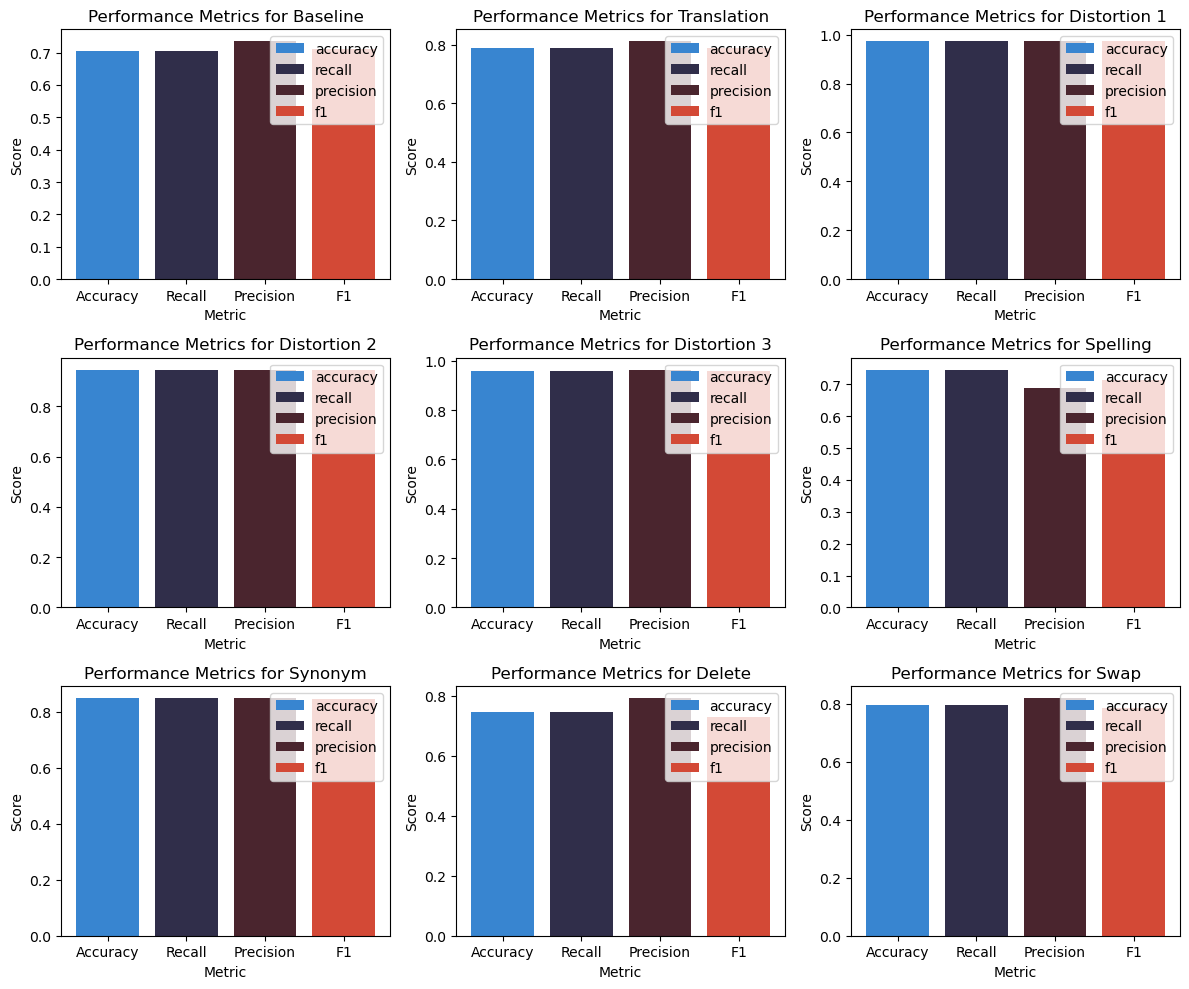

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation results for different distortions
distortion_results = {
    
    'Baseline': {
        'accuracy': results1['evaluation']['eval_accuracy'],
        'recall': results1['evaluation']['eval_recall'],
        'precision': results1['evaluation']['eval_precision'],
        'f1': results1['evaluation']['eval_f1']
    },
    'Translation': {
        'accuracy': translate_model['evaluation']['eval_accuracy'],
        'recall': translate_model['evaluation']['eval_recall'],
        'precision': translate_model['evaluation']['eval_precision'],
        'f1': translate_model['evaluation']['eval_f1']
    },# Adding distortion_model
    'Distortion 1': {
        'accuracy': dist_model['evaluation']['eval_accuracy'],
        'recall': dist_model['evaluation']['eval_recall'],
        'precision': dist_model['evaluation']['eval_precision'],
        'f1': dist_model['evaluation']['eval_f1']
    },
    'Distortion 2': {
        'accuracy': dist_model2['evaluation']['eval_accuracy'],
        'recall': dist_model2['evaluation']['eval_recall'],
        'precision': dist_model2['evaluation']['eval_precision'],
        'f1': dist_model2['evaluation']['eval_f1']
    },
    'Distortion 3': {
        'accuracy': dist_model3['evaluation']['eval_accuracy'],
        'recall': dist_model3['evaluation']['eval_recall'],
        'precision': dist_model3['evaluation']['eval_precision'],
        'f1': dist_model3['evaluation']['eval_f1']
    },
    'Spelling': {
        'accuracy': spelling_model['evaluation']['eval_accuracy'],
        'recall': spelling_model['evaluation']['eval_recall'],
        'precision': spelling_model['evaluation']['eval_precision'],
        'f1': spelling_model['evaluation']['eval_f1']
    },
    'Synonym': {
        'accuracy': synonym_model['evaluation']['eval_accuracy'],
        'recall': synonym_model['evaluation']['eval_recall'],
        'precision': synonym_model['evaluation']['eval_precision'],
        'f1': synonym_model['evaluation']['eval_f1']
    },
    'Delete': {
        'accuracy': delete_model['evaluation']['eval_accuracy'],
        'recall': delete_model['evaluation']['eval_recall'],
        'precision': delete_model['evaluation']['eval_precision'],
        'f1': delete_model['evaluation']['eval_f1']
    },
    'Swap': {
        'accuracy': swap_model['evaluation']['eval_accuracy'],
        'recall': swap_model['evaluation']['eval_recall'],
        'precision': swap_model['evaluation']['eval_precision'],
        'f1': swap_model['evaluation']['eval_f1']
    }
    
}

# Distortions and metrics
metrics = ['accuracy', 'recall', 'precision', 'f1']

# Define colors
num_bars = len(metrics)
bar_colors = sns.color_palette("icefire", num_bars)

# Create a plot for each distortion
plt.figure(figsize=(12, 10))

for i, (distortion, res) in enumerate(distortion_results.items(), start=1):
    plt.subplot(3, 3, i)
    for j, metric in enumerate(metrics):
        plt.bar(metric.capitalize(), res[metric], label=metric, color=bar_colors[j])

    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.title(f'Performance Metrics for {distortion.capitalize()}')
    plt.legend()

plt.tight_layout()
plt.show()


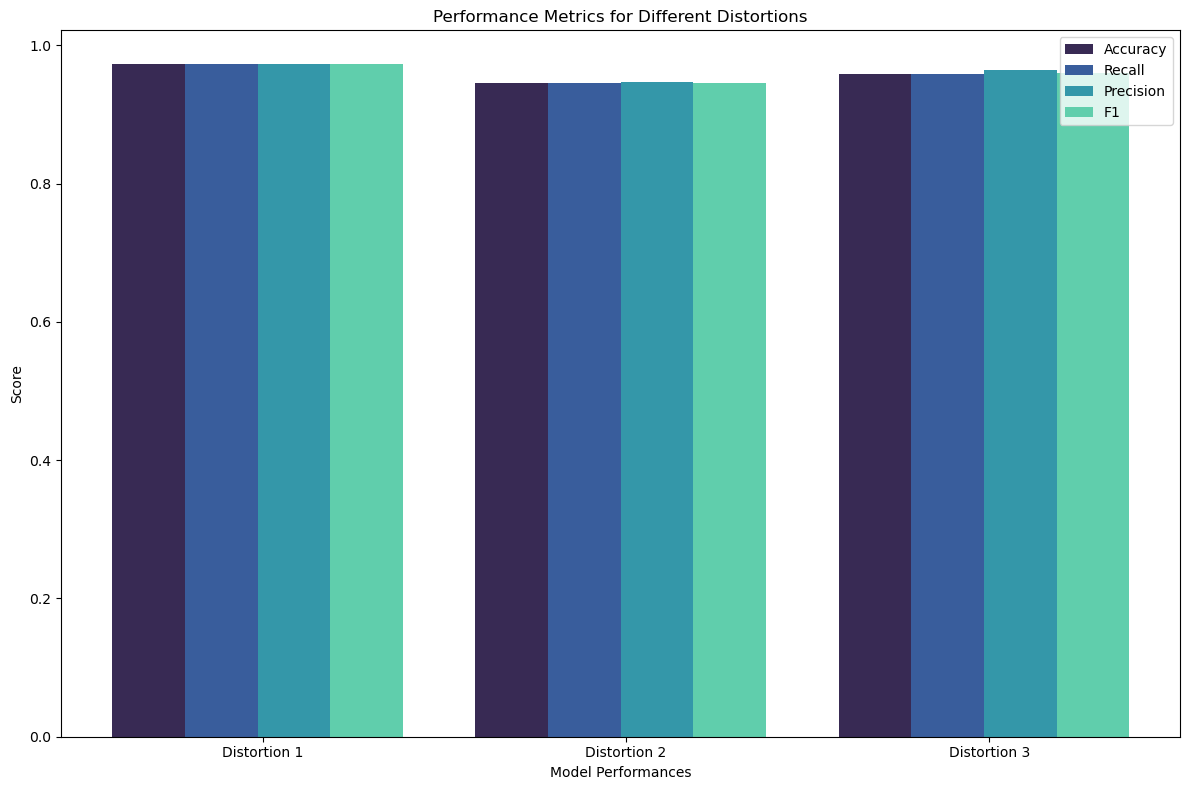

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming this is the evaluation result for the distortion model
distortions_model1 = {
    'accuracy': dist_model['evaluation']['eval_accuracy'],
    'recall': dist_model['evaluation']['eval_recall'],
    'precision': dist_model['evaluation']['eval_precision'],
    'f1': dist_model['evaluation']['eval_f1']
}

distortions_model2 = {
    'accuracy': dist_model2['evaluation']['eval_accuracy'],
    'recall': dist_model2['evaluation']['eval_recall'],
    'precision': dist_model2['evaluation']['eval_precision'],
    'f1': dist_model2['evaluation']['eval_f1']
}

distortions_model3 = {
    'accuracy': dist_model3['evaluation']['eval_accuracy'],
    'recall': dist_model3['evaluation']['eval_recall'],
    'precision': dist_model3['evaluation']['eval_precision'],
    'f1': dist_model3['evaluation']['eval_f1']
}

# Evaluation results for different distortions
distortion_results = {
    'Distortion 1': distortions_model1,  # Adding distortion_model
    'Distortion 2': distortions_model2,
    'Distortion 3': distortions_model3,
}

# Distortions and metrics
distortions = list(distortion_results.keys())
metrics = ['accuracy', 'recall', 'precision', 'f1']

# Number of bars and their positions
num_bars = len(metrics)
bar_width = 0.2
index = np.arange(len(distortions))

# Create a grouped bar plot with manual adjustment
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    scores = [distortion_results[distortion][metric] for distortion in distortions]
    plt.bar(index + i * bar_width - 0.3, scores, bar_width, label=metric.capitalize(), color=sns.color_palette("mako", num_bars)[i])

plt.xlabel('Model Performances')
plt.ylabel('Score')
plt.title('Performance Metrics for Different Distortions')
plt.xticks(index + 0.01 * (num_bars - 1) / 2 , distortions)  #0.01 is for centering 
plt.legend()
plt.tight_layout()
plt.show()


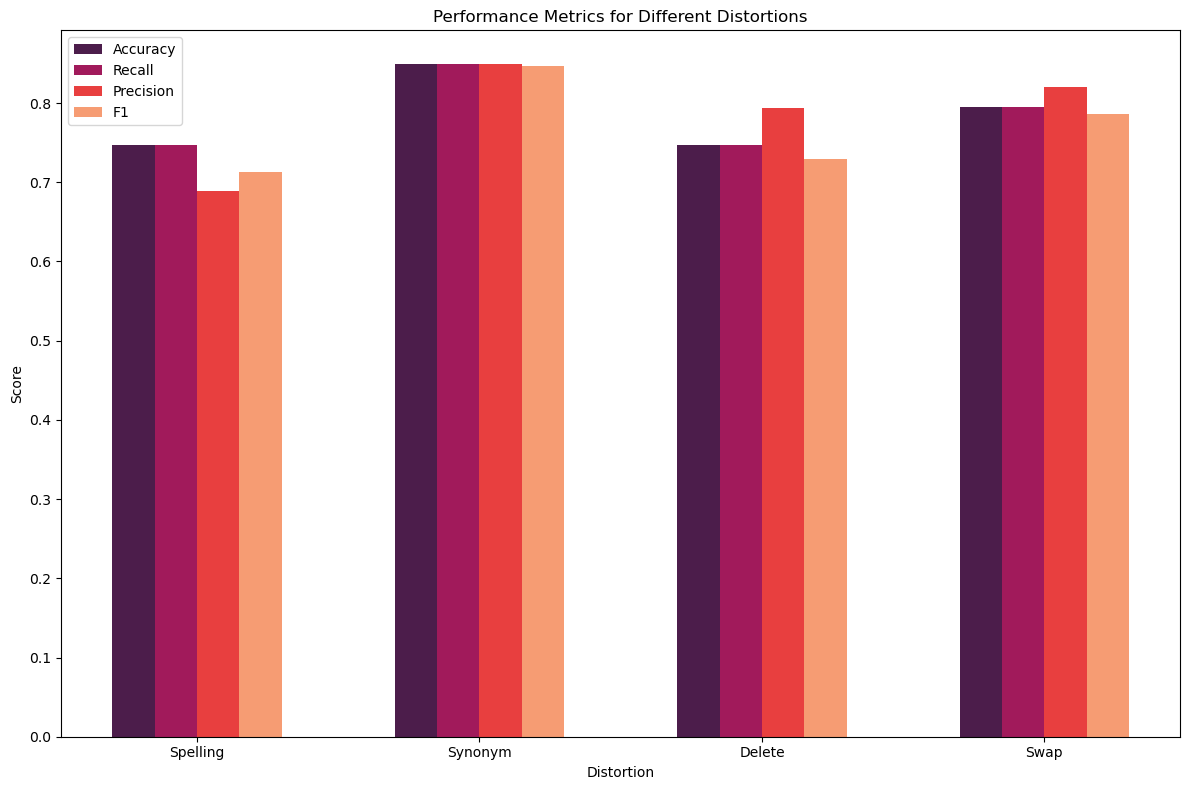

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluation results for different distortions
distortion_results = {
    'Spelling': {
        'accuracy': spelling_model['evaluation']['eval_accuracy'],
        'recall': spelling_model['evaluation']['eval_recall'],
        'precision': spelling_model['evaluation']['eval_precision'],
        'f1': spelling_model['evaluation']['eval_f1']
    },
    'Synonym': {
        'accuracy': synonym_model['evaluation']['eval_accuracy'],
        'recall': synonym_model['evaluation']['eval_recall'],
        'precision': synonym_model['evaluation']['eval_precision'],
        'f1': synonym_model['evaluation']['eval_f1']
    },
    'Delete': {
        'accuracy': delete_model['evaluation']['eval_accuracy'],
        'recall': delete_model['evaluation']['eval_recall'],
        'precision': delete_model['evaluation']['eval_precision'],
        'f1': delete_model['evaluation']['eval_f1']
    },
    'Swap': {
        'accuracy': swap_model['evaluation']['eval_accuracy'],
        'recall': swap_model['evaluation']['eval_recall'],
        'precision': swap_model['evaluation']['eval_precision'],
        'f1': swap_model['evaluation']['eval_f1']
    }
}
# Distortions and metrics
distortions = list(distortion_results.keys())
metrics = ['accuracy', 'recall', 'precision', 'f1']

# Number of bars and their positions
num_bars = len(metrics)
bar_width = 0.15
index = np.arange(len(distortions))

# Create a grouped bar plot for all distortions and metrics
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    scores = [distortion_results[distortion][metric] for distortion in distortions]
    plt.bar(index + i * bar_width, scores, bar_width, label=metric.capitalize(), color=sns.color_palette("rocket", num_bars)[i])

plt.xlabel('Distortion')
plt.ylabel('Score')
plt.title('Performance Metrics for Different Distortions')
plt.xticks(index + bar_width * (num_bars - 1) / 2, distortions)
plt.legend()
plt.tight_layout()
plt.show()

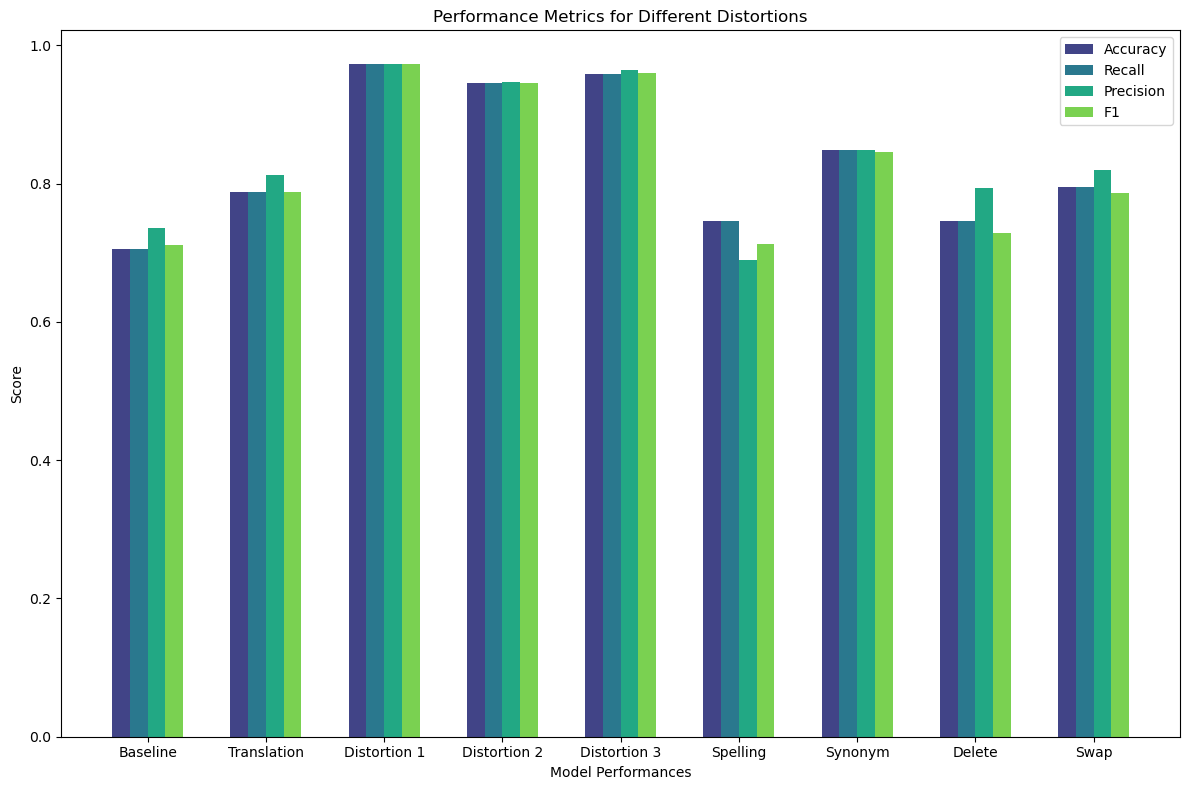

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # Evaluation results for different distortions
distortions_model1 = {
    'accuracy': dist_model['evaluation']['eval_accuracy'],
    'recall': dist_model['evaluation']['eval_recall'],
    'precision': dist_model['evaluation']['eval_precision'],
    'f1': dist_model['evaluation']['eval_f1']
}

distortions_model2 = {
    'accuracy': dist_model2['evaluation']['eval_accuracy'],
    'recall': dist_model2['evaluation']['eval_recall'],
    'precision': dist_model2['evaluation']['eval_precision'],
    'f1': dist_model2['evaluation']['eval_f1']
}


distortions_model3 = {
    'accuracy': dist_model3['evaluation']['eval_accuracy'],
    'recall': dist_model3['evaluation']['eval_recall'],
    'precision': dist_model3['evaluation']['eval_precision'],
    'f1': dist_model3['evaluation']['eval_f1']
}


# Assuming this is the evaluation result for the distortion model
baseline_model = {
    'accuracy': results1['evaluation']['eval_accuracy'],
    'recall': results1['evaluation']['eval_recall'],
    'precision': results1['evaluation']['eval_precision'],
    'f1': results1['evaluation']['eval_f1']
}

# Assuming this is the evaluation result for the distortion model
translation_model = {
    'accuracy': translate_model['evaluation']['eval_accuracy'],
    'recall': translate_model['evaluation']['eval_recall'],
    'precision': translate_model['evaluation']['eval_precision'],
    'f1': translate_model['evaluation']['eval_f1']
}

# Evaluation results for different distortions
distortion_results = {
    'Baseline' : baseline_model,
    'Translation': translation_model,
    'Distortion 1': distortions_model1,  # Adding distortion_model
    'Distortion 2': distortions_model2,
    'Distortion 3': distortions_model3,
    'Spelling': {
        'accuracy': spelling_model['evaluation']['eval_accuracy'],
        'recall': spelling_model['evaluation']['eval_recall'],
        'precision': spelling_model['evaluation']['eval_precision'],
        'f1': spelling_model['evaluation']['eval_f1']
    },
    'Synonym': {
        'accuracy': synonym_model['evaluation']['eval_accuracy'],
        'recall': synonym_model['evaluation']['eval_recall'],
        'precision': synonym_model['evaluation']['eval_precision'],
        'f1': synonym_model['evaluation']['eval_f1']
    },
    'Delete': {
        'accuracy': delete_model['evaluation']['eval_accuracy'],
        'recall': delete_model['evaluation']['eval_recall'],
        'precision': delete_model['evaluation']['eval_precision'],
        'f1': delete_model['evaluation']['eval_f1']
    },
    'Swap': {
        'accuracy': swap_model['evaluation']['eval_accuracy'],
        'recall': swap_model['evaluation']['eval_recall'],
        'precision': swap_model['evaluation']['eval_precision'],
        'f1': swap_model['evaluation']['eval_f1']
    }    
    
}

# Distortions and metrics
distortions = list(distortion_results.keys())
metrics = ['accuracy', 'recall', 'precision', 'f1']

# Number of bars and their positions
num_bars = len(metrics)
bar_width = 0.15
index = np.arange(len(distortions))

# Create a grouped bar plot for all distortions and metrics
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    scores = [distortion_results[distortion][metric] for distortion in distortions]
    plt.bar(index + i * bar_width, scores, bar_width, label=metric.capitalize(), color=sns.color_palette("viridis", num_bars)[i])

plt.xlabel('Model Performances')
plt.ylabel('Score')
plt.title('Performance Metrics for Different Distortions')
plt.xticks(index + bar_width * (num_bars - 1) / 2, distortions)
plt.legend()
plt.tight_layout()
plt.show()


In [44]:
# Assuming this is the evaluation result for the distortion model
distortions_model1 = {
    'accuracy': dist_model['evaluation']['eval_accuracy'],
    'recall': dist_model['evaluation']['eval_recall'],
    'precision': dist_model['evaluation']['eval_precision'],
    'f1': dist_model['evaluation']['eval_f1'],
    'runtime': dist_model['evaluation']['eval_runtime'],
    'samples_per_second': dist_model['evaluation']['eval_samples_per_second'],
    'steps_per_second': dist_model['evaluation']['eval_steps_per_second'],
    'epochs': dist_model['evaluation']['epoch']
}

distortions_model2 = {
    'accuracy': dist_model2['evaluation']['eval_accuracy'],
    'recall': dist_model2['evaluation']['eval_recall'],
    'precision': dist_model2['evaluation']['eval_precision'],
    'f1': dist_model2['evaluation']['eval_f1'],
    'runtime': dist_model2['evaluation']['eval_runtime'],
    'samples_per_second': dist_model2['evaluation']['eval_samples_per_second'],
    'steps_per_second': dist_model2['evaluation']['eval_steps_per_second'],
    'epochs': dist_model2['evaluation']['epoch']
}


distortions_model3 = {
    'accuracy': dist_model3['evaluation']['eval_accuracy'],
    'recall': dist_model3['evaluation']['eval_recall'],
    'precision': dist_model3['evaluation']['eval_precision'],
    'f1': dist_model3['evaluation']['eval_f1'],
    'runtime': dist_model3['evaluation']['eval_runtime'],
    'samples_per_second': dist_model3['evaluation']['eval_samples_per_second'],
    'steps_per_second': dist_model3['evaluation']['eval_steps_per_second'],
    'epochs': dist_model3['evaluation']['epoch']
}


# Assuming this is the evaluation result for the distortion model
baseline_model = {
    'accuracy': results1['evaluation']['eval_accuracy'],
    'recall': results1['evaluation']['eval_recall'],
    'precision': results1['evaluation']['eval_precision'],
    'f1': results1['evaluation']['eval_f1'],
    'runtime': results1['evaluation']['eval_runtime'],
    'samples_per_second': results1['evaluation']['eval_samples_per_second'],
    'steps_per_second': results1['evaluation']['eval_steps_per_second'],
    'epochs': results1['evaluation']['epoch']
}

# Assuming this is the evaluation result for the distortion model
translation_model = {
    'accuracy': translate_model['evaluation']['eval_accuracy'],
    'recall': translate_model['evaluation']['eval_recall'],
    'precision': translate_model['evaluation']['eval_precision'],
    'f1': translate_model['evaluation']['eval_f1'],
    'runtime': translate_model['evaluation']['eval_runtime'],
    'samples_per_second': translate_model['evaluation']['eval_samples_per_second'],
    'steps_per_second': translate_model['evaluation']['eval_steps_per_second'],
    'epochs': translate_model['evaluation']['epoch']
}

# Evaluation results for different distortions
distortion_results = {
    
    'Spelling': {
        'accuracy': spelling_model['evaluation']['eval_accuracy'],
        'recall': spelling_model['evaluation']['eval_recall'],
        'precision': spelling_model['evaluation']['eval_precision'],
        'f1': spelling_model['evaluation']['eval_f1'],
        'runtime': spelling_model['evaluation']['eval_runtime'],
        'samples_per_second': spelling_model['evaluation']['eval_samples_per_second'],
        'steps_per_second': spelling_model['evaluation']['eval_steps_per_second'],
        'epochs': spelling_model['evaluation']['epoch']
    },
    'Synonym': {
        'accuracy': synonym_model['evaluation']['eval_accuracy'],
        'recall': synonym_model['evaluation']['eval_recall'],
        'precision': synonym_model['evaluation']['eval_precision'],
        'f1': synonym_model['evaluation']['eval_f1'],
        'runtime': synonym_model['evaluation']['eval_runtime'],
        'samples_per_second': synonym_model['evaluation']['eval_samples_per_second'],
        'steps_per_second': synonym_model['evaluation']['eval_steps_per_second'],
        'epochs': synonym_model['evaluation']['epoch']
    },
    'Delete': {
        'accuracy': delete_model['evaluation']['eval_accuracy'],
        'recall': delete_model['evaluation']['eval_recall'],
        'precision': delete_model['evaluation']['eval_precision'],
        'f1': delete_model['evaluation']['eval_f1'],
        'runtime': delete_model['evaluation']['eval_runtime'],
        'samples_per_second': delete_model['evaluation']['eval_samples_per_second'],
        'steps_per_second': delete_model['evaluation']['eval_steps_per_second'],
        'epochs': delete_model['evaluation']['epoch']
    },
    'Swap': {
        'accuracy': swap_model['evaluation']['eval_accuracy'],
        'recall': swap_model['evaluation']['eval_recall'],
        'precision': swap_model['evaluation']['eval_precision'],
        'f1': swap_model['evaluation']['eval_f1'],
        'runtime': swap_model['evaluation']['eval_runtime'],
        'samples_per_second': swap_model['evaluation']['eval_samples_per_second'],
        'steps_per_second': swap_model['evaluation']['eval_steps_per_second'],
        'epochs': swap_model['evaluation']['epoch']
    },
    'Distortion 1': distortions_model1,  # Adding distortion_model
    'Distortion 2': distortions_model2,
    'Distortion 3': distortions_model3,
    'Baseline' : baseline_model,
    'Translation': translation_model
}

# Distortions and metrics
distortions = list(distortion_results.keys())
metrics = ['accuracy', 'recall', 'precision', 'f1', 'runtime', 'samples_per_second', 'steps_per_second', 'epochs']

# Print out the values
for distortion, scores in distortion_results.items():
    print(f"---- {distortion} ----")
    for metric in metrics:
        print(f"{metric.capitalize()}: {scores[metric]}")


---- Spelling ----
Accuracy: 0.7465753424657534
Recall: 0.7465753424657534
Precision: 0.6895046353950464
F1: 0.7128548607618966
Runtime: 3.3969
Samples_per_second: 42.981
Steps_per_second: 2.944
Epochs: 20.0
---- Synonym ----
Accuracy: 0.8493150684931506
Recall: 0.8493150684931506
Precision: 0.8490770959476674
F1: 0.846485754401034
Runtime: 3.1104
Samples_per_second: 46.939
Steps_per_second: 3.215
Epochs: 20.0
---- Delete ----
Accuracy: 0.7465753424657534
Recall: 0.7465753424657534
Precision: 0.793192146426541
F1: 0.7287319660118095
Runtime: 3.0922
Samples_per_second: 47.215
Steps_per_second: 3.234
Epochs: 20.0
---- Swap ----
Accuracy: 0.7945205479452054
Recall: 0.7945205479452054
Precision: 0.8202073611320186
F1: 0.7865544648199119
Runtime: 3.1268
Samples_per_second: 46.693
Steps_per_second: 3.198
Epochs: 20.0
---- Distortion 1 ----
Accuracy: 0.9726027397260274
Recall: 0.9726027397260274
Precision: 0.9730919765166339
F1: 0.9726673123933399
Runtime: 3.6367
Samples_per_second: 40.147
St

__Models results trained on different data__
| Model   | Type                 | Accuracy | Recall | Precision | F1       | Runtime | Samples/s | Steps/s | Epochs |
|---------|----------------------|----------|--------|-----------|----------|---------|------------|---------|-----------|
| Model 1 | Baseline             | 0.71     | 0.71   | 0.74      | 0.71     | 0.4549  | 37.372     | 6.595   | 20      |
| Model 1 | Translation          | 0.79     | 0.79   | 0.81      | 0.79     | 4.0552  | 36.003     | 4.685   | 20      |
| Model 1 | All Distortion       | 0.97     | 0.97   | 0.97      | 0.97     | 3.6407  | 40.102     | 5.219   | 20      |
| Model 2 | All Distortion       | 0.94     | 0.94   | 0.95      | 0.94     | 3.6407  | 40.102     | 5.219   | 20      |
| Model 3 | All Distortion       | 0.96     | 0.96   | 0.97      | 0.96     | 3.3319  | 43.819     | 3.001   | 20      |
| Model 3 | Spelling Distortion  | 0.75     | 0.75   | 0.69      | 0.71     | 3.3969  | 42.981     | 2.944   | 20      |
| Model 3 | Synonym Distortion   | 0.85     | 0.85   | 0.85      | 0.85     | 3.1104  | 46.939     | 3.215   | 20      |
| Model 3 | Deletion Distortion  | 0.75     | 0.75   | 0.79      | 0.73     | 3.0922  | 47.215     | 3.234   | 20      |
| Model 3 | Swap Distortion      | 0.79     | 0.79   | 0.82      | 0.79     | 3.1268  | 46.693     | 3.198   | 20      |


__How each model is different__
| Model | Learning Rate | Evaluation Strategy | Train Batch Size | Eval Batch Size | Warmup Steps | Weight Decay | Logging Steps |
|-------|--------------|-------------------|------------------|-----------------|--------------|--------------|---------------|
| Model 1 | 5e-5 | Steps | 8 | 8 | 10 | 0.1 | 10 |
| Model 2 | 1e-5 | Epoch | 8 | 8 | 100 | 0.1 | 10 |
| Model 3 | 3e-5 | Epoch | 16 | 16 | 500 | 0.01 | 100 |


__Choosing the data and Model for Part 3.:__

The experiments conducted with different models and distortion techniques yield interesting insights into the effectiveness of data augmentation on model performance. Here's a summary of the findings:

- __Baseline vs. Translation vs. Augmentation:__
The baseline model achieved moderate performance across all metrics, with an accuracy of 0.71.
Translation significantly improved the model's performance, with an accuracy of 0.79, indicating the importance of data diversification.
Augmentation further enhanced the model's accuracy to 0.97, demonstrating the effectiveness of augmenting data with various distortions.
- __Effectiveness of Models:__
Model 2 achieved an accuracy of 0.94, which is slightly lower than the augmented data model but still considerably higher than the baseline.
Model 3, trained on augmented data, showed the highest accuracy of 0.96, indicating its superior performance.
- __Distortion Techniques:__
Spelling distortion resulted in a slight decrease in accuracy compared to the baseline, indicating the limited effectiveness of this distortion technique.
Synonym distortion showed a moderate improvement in accuracy, with an accuracy of 0.83.
Deletion distortion resulted in a slight decrease in accuracy compared to the baseline.
Swap distortion showed a moderate improvement in accuracy, with an accuracy of 0.80.

When the baseline model was trained on augemented data (Distortion), it gave an amazing accuracy of 97%. However it took a bit long to train on and it was better to tweek the model for faster results. 

In conclusion, the experiments highlight the importance of data augmentation in improving model performance. Augmenting data with various distortion techniques, such as synonym and swap distortions, significantly enhances model accuracy. Additionally, the choice of model architecture also plays a crucial role, with Model 3 showing the highest accuracy when trained on augmented data. The main advantage of Model 3 lies in its faster training speed, even when handling larger datasets. With a higher batch size and fewer training epochs, Model 3 achieves competitive performance metrics while significantly reducing training time. This efficiency could be crucial, especially in scenarios where computational resources are limited or when training on large-scale datasets.Therefore, considering both performance and training efficiency, Model 3 could be the preferred option. 

# Part 3


__Finding A small pretrained model on the Hugging Face hub and fine-tuning it to match the output of your best model.__

We will be using TinyBERT as it is small and faster as compared to the other models.

In [45]:
from torch.utils.data import Dataset
from transformers import BertTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
import numpy as np

class TwoColumnDFDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __getitem__(self, index):
        text = str(self.data["Utterance"].iloc[index])
        text = " ".join(text.split())
        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        ids = inputs['input_ids'][0]
        mask = inputs['attention_mask'][0]
        labels = torch.tensor(self.data["Intent"].iloc[index], dtype=torch.long)
        return {
            'input_ids': ids,
            'attention_mask': mask,
            'labels': labels
        }

    def __len__(self):
        return self.len

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    corrects = p.label_ids
    accuracy = accuracy_score(corrects, preds)
    recall = recall_score(corrects, preds, average='weighted', zero_division=0)
    precision = precision_score(corrects, preds, average='weighted', zero_division=0)
    f1 = f1_score(corrects, preds, average='weighted')
    
    return {
        "accuracy": accuracy,
        "recall": recall,
        "precision": precision,
        "f1": f1,
    }

def train_evaluate_tiny_model(train_df, test_df):
    tokenizer = BertTokenizer.from_pretrained('huawei-noah/TinyBERT_General_4L_312D')
    max_length = 50
    training_set = TwoColumnDFDataset(train_df, tokenizer, max_length)
    testing_set = TwoColumnDFDataset(test_df, tokenizer, max_length)

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=20,
        learning_rate=3e-5,  
        evaluation_strategy="epoch",  
        per_device_train_batch_size=16,  
        per_device_eval_batch_size=16,  
        warmup_steps=500,  
        weight_decay=0.01,  
        logging_dir='./logs',
        logging_steps=100,
    )

    model = AutoModelForSequenceClassification.from_pretrained('huawei-noah/TinyBERT_General_4L_312D', 
                                                               num_labels=len(train_df['Intent'].unique()))

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=training_set,
        eval_dataset=testing_set,
        compute_metrics=compute_metrics,
    )
    trainer.train()
    evaluation_result = trainer.evaluate()
    return evaluation_result


In [46]:
tiny_dist_result = train_evaluate_tiny_model(X_train_dist, X_test_dist)
tiny_dist_result

C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,No log,1.945892,0.109589,0.109589,0.012524,0.022480
2,No log,1.944637,0.109589,0.109589,0.012706,0.022772
3,No log,1.942044,0.109589,0.109589,0.012262,0.022056
4,No log,1.937623,0.109589,0.109589,0.013284,0.023695
5,1.940900,1.927318,0.212329,0.212329,0.070434,0.101203
6,1.940900,1.908798,0.294521,0.294521,0.160587,0.194775
7,1.940900,1.878497,0.376712,0.376712,0.350358,0.280177
8,1.940900,1.836077,0.445205,0.445205,0.638956,0.383908
9,1.940900,1.776090,0.554795,0.554795,0.665917,0.488358
10,1.866000,1.705275,0.657534,0.657534,0.780839,0.625557


{'eval_loss': 0.6958892345428467,
 'eval_accuracy': 0.9041095890410958,
 'eval_recall': 0.9041095890410958,
 'eval_precision': 0.92277887972892,
 'eval_f1': 0.8925441861292127,
 'eval_runtime': 0.7819,
 'eval_samples_per_second': 186.724,
 'eval_steps_per_second': 12.789,
 'epoch': 20.0}

In [47]:
tiny_dist_result

{'eval_loss': 0.6958892345428467,
 'eval_accuracy': 0.9041095890410958,
 'eval_recall': 0.9041095890410958,
 'eval_precision': 0.92277887972892,
 'eval_f1': 0.8925441861292127,
 'eval_runtime': 0.7819,
 'eval_samples_per_second': 186.724,
 'eval_steps_per_second': 12.789,
 'epoch': 20.0}

| Model   | Type                 | Accuracy | Recall | Precision | F1       | Runtime | Samples/s | Steps/s | Epochs |
|---------|----------------------|----------|--------|-----------|----------|---------|------------|---------|-----------|
| Model 1 | Baseline             | 0.71     | 0.71   | 0.74      | 0.71     | 0.4549  | 37.372     | 6.595   | 20      |
| Model 1 | Translation          | 0.79     | 0.79   | 0.81      | 0.79     | 4.0552  | 36.003     | 4.685   | 20      |
| Model 1 | All Distortion       | 0.97     | 0.97   | 0.97      | 0.97     | 3.6407  | 40.102     | 5.219   | 20      |
| Model 2 | All Distortion       | 0.94     | 0.94   | 0.95      | 0.94     | 3.6407  | 40.102     | 5.219   | 20      |
| Model 3 | All Distortion       | 0.96     | 0.96   | 0.97      | 0.96     | 3.3319  | 43.819     | 3.001   | 20      |
| Model 3 | Spelling Distortion  | 0.75     | 0.75   | 0.69      | 0.71     | 3.3969  | 42.981     | 2.944   | 20      |
| Model 3 | Synonym Distortion   | 0.85     | 0.85   | 0.85      | 0.85     | 3.1104  | 46.939     | 3.215   | 20      |
| Model 3 | Deletion Distortion  | 0.75     | 0.75   | 0.79      | 0.73     | 3.0922  | 47.215     | 3.234   | 20      |
| Model 3 | Swap Distortion      | 0.79     | 0.79   | 0.82      | 0.79     | 3.1268  | 46.693     | 3.198   | 20      |
| TinyBERT| All Distortion       | 0.90     | 0.90   | 0.92      | 0.89     | 0.7819  | 186.724    | 12.789  | 20      |


As we can see the accuracy, recall, precision and F1 score is decreased. However __The TinyBERT model is faster than others.__ The difference between the evaluation metrics is not much as compared to the Model 3. 


__Pruining and Plotting the effects of pruning the model.__

In [49]:
import numpy as np
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
import time
from torch.nn.utils import prune

class TwoColumnDFDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __getitem__(self, index):
        text = str(self.data["Utterance"].iloc[index])
        text = " ".join(text.split())
        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        ids = inputs['input_ids'][0]
        mask = inputs['attention_mask'][0]
        labels = torch.tensor(self.data["Intent"].iloc[index], dtype=torch.long)
        return {
            'input_ids': ids,
            'attention_mask': mask,
            'labels': labels
        }

    def __len__(self):
        return self.len

def compute_metrics(pred):
    preds = np.argmax(pred.predictions, axis=1)
    corrects = pred.label_ids
    accuracy = accuracy_score(corrects, preds)
    recall = recall_score(corrects, preds, average='weighted', zero_division=0)
    precision = precision_score(corrects, preds, average='weighted', zero_division=0)
    f1 = f1_score(corrects, preds, average='weighted')
    
    return {
        "accuracy": accuracy,
        "recall": recall,
        "precision": precision,
        "f1": f1,
    }

def apply_pruning_to_model(model, pruning_amount):
    # Apply pruning to all linear layers of the model
    for name, module in model.named_modules():
        if isinstance(module, torch.nn.Linear):
            prune.l1_unstructured(module, name='weight', amount=pruning_amount)

def tinybert_model_with_pruning(train_df, test_df, pruning_amount):
    tokenizer = BertTokenizer.from_pretrained('huawei-noah/TinyBERT_General_4L_312D')
    #tokenizer = TinyBertTokenizer.from_pretrained('huawei-noah/TinyBERT_General_4L_312D')
    max_length = 50
    training_set = TwoColumnDFDataset(train_df, tokenizer, max_length)
    testing_set = TwoColumnDFDataset(test_df, tokenizer, max_length)

    model = AutoModelForSequenceClassification.from_pretrained('huawei-noah/TinyBERT_General_4L_312D', 
                                                               num_labels=len(np.unique(train_df['Intent'])))

    # Apply pruning
    apply_pruning_to_model(model, pruning_amount=pruning_amount)

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=20,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=100,
        evaluation_strategy="steps",
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
    )
    

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=training_set,
        eval_dataset=testing_set,
        compute_metrics=compute_metrics
    )

    trainer.train()
    evaluation_result = trainer.evaluate()
    
    return model, evaluation_result

def ensure_directory(directory_name):
    if not os.path.exists(directory_name):
        os.makedirs(directory_name)
    return directory_name

def save_model(model, filename):
    models_dir = ensure_directory('models')  # Create a folder called "models" in the working directory
    file_path = os.path.join(models_dir, filename)  # Combine the directory with the filename
    torch.save(model.state_dict(), file_path)  # Save the model state
    return os.path.getsize(file_path)  # Return the file size in bytes


def run_pruning_experiments(train_df, test_df, pruning_levels):
    results = []

    for pruning_amount in pruning_levels:
        start_time_1 = time.time()
        model, eval_results = tinybert_model_with_pruning(train_df, test_df, pruning_amount=pruning_amount)
        end_time_1 = time.time()
        
        start_time_2 = time.time()
         # Save the model and get file size
        filename = f"prune_tinyBERT_{pruning_amount:.2f}.pt"
        file_size = save_model(model, filename)  # Save and get file size in bytes
        end_time_2 = time.time()

        results.append({
            "Pruning Amount": pruning_amount,
            "Eval Loss": eval_results['eval_loss'],
            "Eval Accuracy": eval_results['eval_accuracy'],
            "Runtime of evaluation(s)": end_time_1 - start_time_1,
        })
    
    return pd.DataFrame(results)

# Define the pruning levels
pruning_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Run the experiments
experiment_results = run_pruning_experiments(X_train_dist, X_test_dist, pruning_levels)

# Print the results
experiment_results



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
100,1.935600,1.918248,0.171233,0.171233,0.129020,0.086219
200,1.784400,1.587160,0.630137,0.630137,0.674995,0.543597
300,1.292900,1.055582,0.842466,0.842466,0.823177,0.819771
400,0.765500,0.549548,0.910959,0.910959,0.952897,0.890101


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
100,1.937000,1.919481,0.232877,0.232877,0.071451,0.108505
200,1.803900,1.658119,0.520548,0.520548,0.688179,0.441481
300,1.420000,1.195719,0.794521,0.794521,0.768021,0.763038
400,0.860700,0.593429,0.910959,0.910959,0.958329,0.899674


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
100,1.937100,1.921626,0.226027,0.226027,0.071954,0.105884
200,1.825800,1.688150,0.534247,0.534247,0.494888,0.429865
300,1.459000,1.226535,0.780822,0.780822,0.842017,0.757424
400,0.905100,0.622863,0.931507,0.931507,0.957959,0.927730


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
100,1.938400,1.924809,0.226027,0.226027,0.069317,0.106002
200,1.843500,1.706747,0.547945,0.547945,0.722585,0.471195
300,1.478500,1.276083,0.842466,0.842466,0.866165,0.832274
400,0.986800,0.755023,0.890411,0.890411,0.854248,0.864540


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
100,1.940300,1.931141,0.184932,0.184932,0.058160,0.084507
200,1.876500,1.764069,0.513699,0.513699,0.340661,0.390400
300,1.547900,1.341805,0.849315,0.849315,0.866607,0.844231
400,1.058500,0.828627,0.917808,0.917808,0.933448,0.911044


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
100,1.940800,1.933298,0.171233,0.171233,0.179588,0.084547
200,1.904200,1.837201,0.506849,0.506849,0.371363,0.408720
300,1.650600,1.445929,0.726027,0.726027,0.817225,0.642482
400,1.195700,0.987071,0.904110,0.904110,0.911000,0.901826


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
100,1.940500,1.934146,0.260274,0.260274,0.169349,0.186506
200,1.920300,1.897794,0.239726,0.239726,0.182078,0.121663
300,1.788900,1.624956,0.657534,0.657534,0.529360,0.561697
400,1.401000,1.209477,0.828767,0.828767,0.810582,0.804345


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
100,1.942600,1.938877,0.171233,0.171233,0.029321,0.050068
200,1.930100,1.919968,0.171233,0.171233,0.029321,0.050068
300,1.890300,1.823635,0.500000,0.500000,0.364796,0.389848
400,1.636500,1.431646,0.828767,0.828767,0.879969,0.814244


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
100,1.945300,1.943361,0.171233,0.171233,0.029321,0.050068
200,1.938700,1.933080,0.171233,0.171233,0.029321,0.050068
300,1.922600,1.915868,0.171233,0.171233,0.029321,0.050068
400,1.858700,1.746078,0.650685,0.650685,0.621989,0.560560


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
100,1.946000,1.945261,0.143836,0.143836,0.037174,0.051047
200,1.943500,1.941857,0.171233,0.171233,0.029321,0.050068
300,1.938100,1.935204,0.171233,0.171233,0.029321,0.050068
400,1.926400,1.919812,0.171233,0.171233,0.029321,0.050068


,Pruning Amount,Eval Loss,Eval Accuracy,Runtime of evaluation(s)
0,0.0,0.354667,0.917808,141.964502
1,0.1,0.398900,0.931507,141.850449
2,0.2,0.416068,0.952055,144.311969
3,0.3,0.536885,0.883562,147.050217
4,0.4,0.603434,0.958904,148.695349
5,0.5,0.782290,0.924658,149.230184
6,0.6,1.014082,0.849315,148.484680
7,0.7,1.243450,0.863014,148.615211
8,0.8,1.582099,0.780822,148.857196
9,0.9,1.901299,0.226027,149.065953


- __Evaluation Loss:__
Initially, as the pruning amount increases, the evaluation loss tends to increase. This suggests that pruning leads to a reduction in model complexity, which may affect its ability to generalize to unseen data, hence increasing the loss.
However, after a certain point (around pruning amount 0.6), the evaluation loss starts to increase significantly, indicating that the model is losing important information due to excessive pruning.
- __Evaluation Accuracy:__
The evaluation accuracy follows a similar trend to the evaluation loss. Initially, as the pruning amount increases, the evaluation accuracy slightly decreases. This is expected as pruning removes parameters from the model, reducing its capacity to learn complex patterns.
However, after a certain point (around pruning amount 0.6), the evaluation accuracy drops more noticeably, indicating that the model's performance is significantly affected by the pruning.
- __Runtime of Evaluation:__
The runtime of evaluation remains relatively stable across different pruning amounts, indicating that pruning doesn't significantly affect the computational resources required for evaluation. This suggests that even heavily pruned models can be evaluated efficiently.


- Pruning Amounts 0.1 to 0.5: These pruning amounts maintain relatively high evaluation accuracy while achieving a reduction in model size. They strike a good balance between model size reduction and performance preservation.
- Stable Runtime: The runtime for evaluation remains relatively stable across different pruning amounts, indicating that pruning doesn't significantly affect computational resources during evaluation.

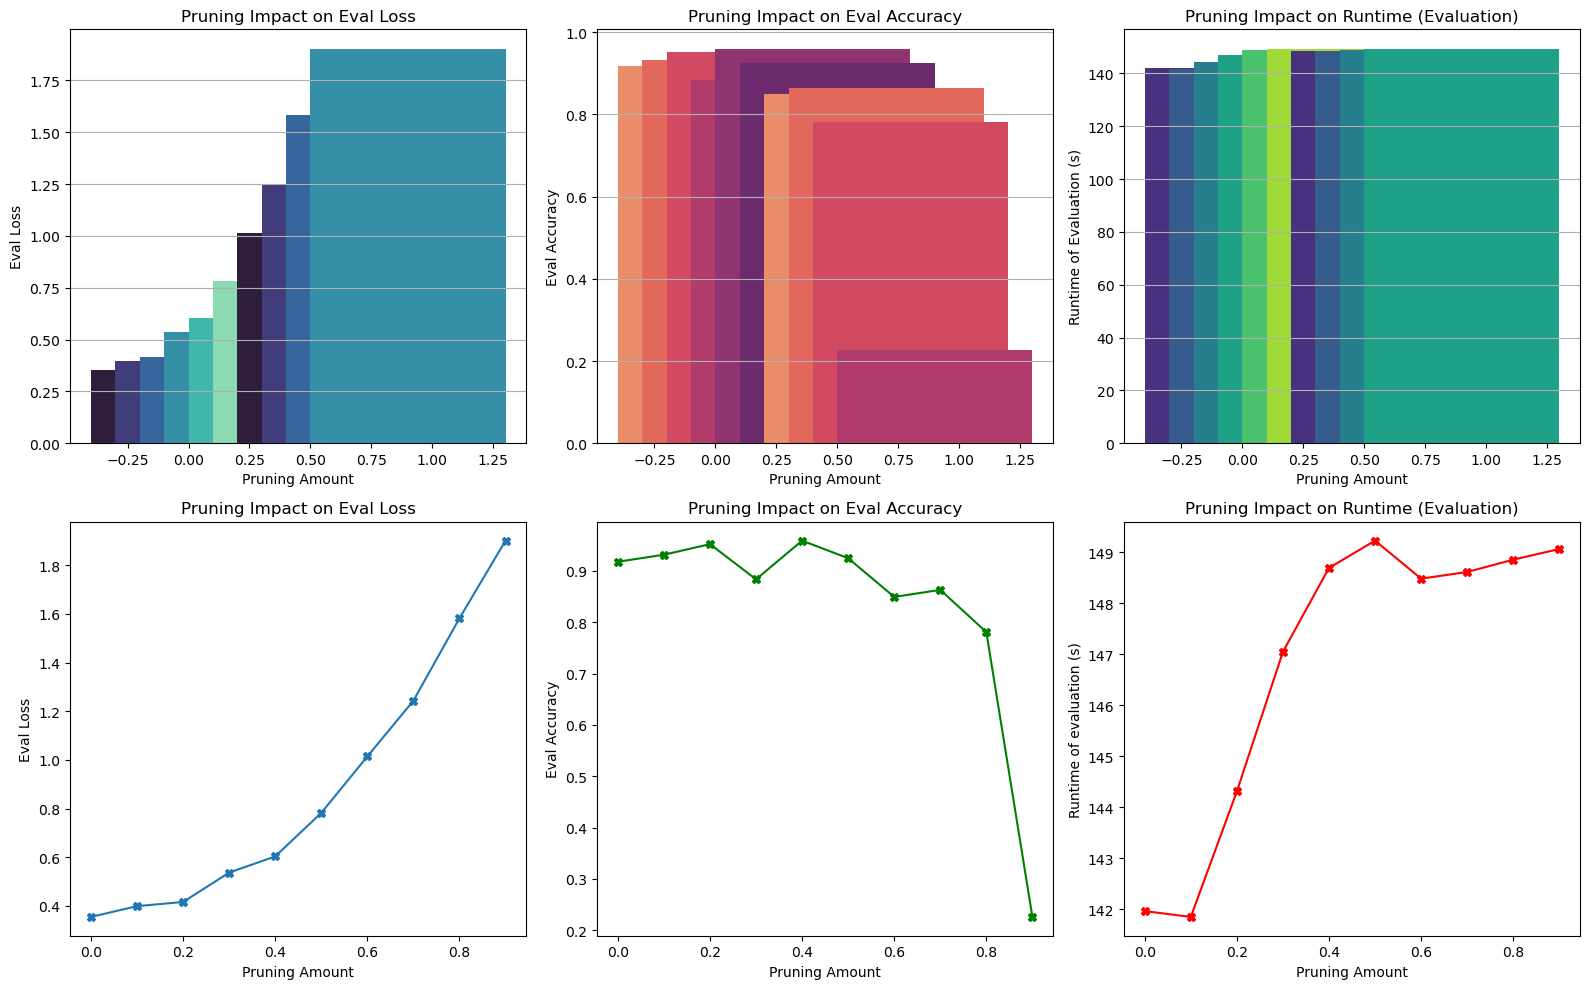

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
plt.figure(figsize=(16, 10))

# Bar plot for Eval Loss
plt.subplot(2, 3, 1)
plt.bar(experiment_results['Pruning Amount'], experiment_results['Eval Loss'], color=sns.color_palette("mako"))
plt.title('Pruning Impact on Eval Loss')
plt.xlabel('Pruning Amount')
plt.ylabel('Eval Loss')
plt.grid(axis='y')

# Bar plot for Eval Accuracy
plt.subplot(2, 3, 2)
plt.bar(experiment_results['Pruning Amount'], experiment_results['Eval Accuracy'], color=sns.color_palette("flare"))
plt.title('Pruning Impact on Eval Accuracy')
plt.xlabel('Pruning Amount')
plt.ylabel('Eval Accuracy')
plt.grid(axis='y')

# Bar plot for Runtime of Evaluation
plt.subplot(2, 3, 3)
plt.bar(experiment_results['Pruning Amount'], experiment_results['Runtime of evaluation(s)'], color=sns.color_palette("viridis"))
plt.title('Pruning Impact on Runtime (Evaluation)')
plt.xlabel('Pruning Amount')
plt.ylabel('Runtime of Evaluation (s)')
plt.grid(axis='y')

# Plotting eval_loss
plt.subplot(2, 3, 4)  
plt.plot(experiment_results['Pruning Amount'], experiment_results['Eval Loss'], marker='X')
plt.title('Pruning Impact on Eval Loss')
plt.xlabel('Pruning Amount')
plt.ylabel('Eval Loss')

# Plotting eval_accuracy
plt.subplot(2, 3, 5)  
plt.plot(experiment_results['Pruning Amount'], experiment_results['Eval Accuracy'], marker='X', color='green')
plt.title('Pruning Impact on Eval Accuracy')
plt.xlabel('Pruning Amount')
plt.ylabel('Eval Accuracy')

# Plotting runtime of evaluation 
plt.subplot(2, 3, 6)  
plt.plot(experiment_results['Pruning Amount'], experiment_results['Runtime of evaluation(s)'], marker='X', color='red')
plt.title('Pruning Impact on Runtime (Evaluation)')
plt.xlabel('Pruning Amount')
plt.ylabel('Runtime of evaluation (s)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


We can clearly see how the Accuracy, Evaluation Loss, and Runtime changed while pruining.


__Quantizing the model and checking how it was differnt.__

Since we are just training the model, we will comment out the evaluation steps

In [53]:
import numpy as np
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
import time


class TwoColumnDFDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __getitem__(self, index):
        text = str(self.data["Utterance"].iloc[index])
        text = " ".join(text.split())
        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        ids = inputs['input_ids'][0]
        mask = inputs['attention_mask'][0]
        labels = torch.tensor(self.data["Intent"].iloc[index], dtype=torch.long)
        return {
            'input_ids': ids,
            'attention_mask': mask,
            'labels': labels
        }

    def __len__(self):
        return self.len

def compute_metrics(pred):
    preds = np.argmax(pred.predictions, axis=1)
    corrects = pred.label_ids
    accuracy = accuracy_score(corrects, preds)
    recall = recall_score(corrects, preds, average='weighted', zero_division=0)
    precision = precision_score(corrects, preds, average='weighted', zero_division=0)
    f1 = f1_score(corrects, preds, average='weighted')
    
    return {
        "accuracy": accuracy,
        "recall": recall,
        "precision": precision,
        "f1": f1,
    }


def tinybert_model_quantize(train_df, device):
    tokenizer = BertTokenizer.from_pretrained('huawei-noah/TinyBERT_General_4L_312D')
    #tokenizer = TinyBertTokenizer.from_pretrained('huawei-noah/TinyBERT_General_4L_312D')
    max_length = 50
    training_set = TwoColumnDFDataset(train_df, tokenizer, max_length)
    #testing_set = TwoColumnDFDataset(test_df, tokenizer, max_length)

    model = AutoModelForSequenceClassification.from_pretrained('huawei-noah/TinyBERT_General_4L_312D', 
                                                               num_labels=len(np.unique(train_df['Intent'])))

   

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=20,
        per_device_train_batch_size=16,
        #per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=100,
        eval_steps = 20,
        #evaluation_strategy="steps",
        #load_best_model_at_end=True,
        #metric_for_best_model="accuracy",
    )
    model.to(device)

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=training_set,
        #eval_dataset=testing_set,
        #compute_metrics=compute_metrics
    )

    trainer.train()
    
    # Save the model after training
    float_model_path = './models/float_trained_model.pt'
    torch.save(model.state_dict(), float_model_path)
    
    #evaluation_result = trainer.evaluate()
    
    return model, float_model_path

In [54]:
device='cpu'
tinybert_model_quantize(X_train_dist, device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Sahar Tosif Jamal\anaconda_main\Lib\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Step,Training Loss
100,1.935600
200,1.773700
300,1.355700
400,0.761900


(BertForSequenceClassification(
   (bert): BertModel(
     (embeddings): BertEmbeddings(
       (word_embeddings): Embedding(30522, 312, padding_idx=0)
       (position_embeddings): Embedding(512, 312)
       (token_type_embeddings): Embedding(2, 312)
       (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
       (dropout): Dropout(p=0.1, inplace=False)
     )
     (encoder): BertEncoder(
       (layer): ModuleList(
         (0-3): 4 x BertLayer(
           (attention): BertAttention(
             (self): BertSelfAttention(
               (query): Linear(in_features=312, out_features=312, bias=True)
               (key): Linear(in_features=312, out_features=312, bias=True)
               (value): Linear(in_features=312, out_features=312, bias=True)
               (dropout): Dropout(p=0.1, inplace=False)
             )
             (output): BertSelfOutput(
               (dense): Linear(in_features=312, out_features=312, bias=True)
               (LayerNorm): LayerNor

In [55]:
float_trained_model_1 = './models/float_trained_model.pt'

trained_float_model_size = os.path.getsize(float_trained_model_1) / (1024 * 1024) # Size in MB
trained_float_model_size

54.77712154388428

In [56]:
from torch.nn.utils import prune #3.b
import torch.quantization
from torch.quantization import quantize_dynamic #3.c

In [ ]:
train_labels = torch.tensor(X_train_dist['Intent'].tolist()).to(device)  

In [62]:
# trained model file is "float_trained_model.pt"
model_path = './models/float_trained_model.pt'

# Load the trained model weights
trained_model_weights = torch.load(model_path, map_location=device)

# Initialize the model architecture
model_architecture = AutoModelForSequenceClassification.from_pretrained('huawei-noah/TinyBERT_General_4L_312D',
                                                                        num_labels=len(np.unique(train_labels)))

# Set the quantization config for AMD Ryzen 7
# Windows doesn't support QNNPACK so we will use fbgemm
os.environ['PYTORCH_ENABLE_MPS_FALLBACK']="1"
#torch.ao.quantization.get_default_qat_qconfig('x86')
torch.backends.quantized.engine = 'fbgemm'      #'qnnpack' 

# Load the weights into the model architecture
model_architecture.load_state_dict(trained_model_weights)

# Now `model_architecture` contains trained model and is ready to be quantized and moved to the device
model_architecture.to(device)


# Quantize the model dynamically
quantized_trained_model = torch.quantization.quantize_dynamic(model_architecture,  # the original trained model
                                                              {torch.nn.Linear},  # a set of layers to dynamically quantize
                                                              dtype=torch.qint8  # the target dtype for quantized weights
                                                             )


# Save the quantized model to the disk for future use
quantized_trained_model_path = './models/quantized_trained_model.pt'
torch.save(quantized_trained_model.state_dict(), quantized_trained_model_path)


#torch.save(quantized_model.state_dict(), quantized_trained_model_path)

print(f"Quantized model saved to {quantized_trained_model_path}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Quantized model saved to ./models/quantized_trained_model.pt


In [63]:
import platform
print(platform.processor())

AMD64 Family 25 Model 80 Stepping 0, AuthenticAMD


__Note:__ As you can see the processor is "AMD64", it doesn't support QNNPACK as this is not a ARM based CPU. The best alternative is to use FBGEMM. __Facebook General Matrix Multiplication library__ which was developed by Facebook for fast matrix multiplication operations. It provides efficient implementations of general matrix multiplication (GEMM) and convolution operations. Optimized for x86 CPUs. Supports both floating-point and quantized operations. Suitable for desktop and server CPUs. Typically used for x86-based CPUs.


__QNNPACK__ is Developed by Facebook specifically for running quantized neural networks on mobile devices. __Quantized Neural Network PACKage__ is optimized for ARM-based CPUs. Provides fast and memory-efficient operations for quantized neural networks. Suitable for mobile and embedded devices. Typically used for ARM-based mobile CPUs.

In [64]:
quantized_trained_model_size = os.path.getsize(quantized_trained_model_path) / (1024 * 1024) # Size in MB
quantized_trained_model_size

41.48743438720703

In [66]:
def model_predict(model, input_ids, attention_mask):
    model.eval()  # Ensure the model is in eval mode for predictions
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits  # Extract logits from the model's output
    return logits

def calculate_accuracy(logits, labels):
    preds = torch.argmax(logits, dim=1)  # Get the index of the max logit
    corrects = (preds == labels).float()  # Compare with true labels
    accuracy = corrects.sum() / len(corrects)
    return accuracy.item()


# Load the MobileBERT tokenizer to tokenize
tokenizer = MobileBertTokenizer.from_pretrained('google/mobilebert-uncased')

# Tokenize and encode the input texts
train_encodings = tokenizer(X_train_dist['Utterance'].tolist(), truncation=True, padding=True, max_length=50)
test_encodings = tokenizer(X_test_dist['Utterance'].tolist(), truncation=True, padding=True, max_length=50)

# Extract input IDs and attention masks
train_input_ids = torch.tensor(train_encodings['input_ids']).to(device)
train_attention_mask = torch.tensor(train_encodings['attention_mask']).to(device)
train_labels = torch.tensor(X_train_dist['Intent'].tolist()).to(device)  

test_input_ids = torch.tensor(test_encodings['input_ids']).to(device)
test_attention_mask = torch.tensor(test_encodings['attention_mask']).to(device)
test_labels = torch.tensor(X_test_dist['Intent'].tolist()).to(device)  



# model file is "float_trained_model.pt"
float_trained_model_path = './models/float_trained_model.pt'
#model_path = './models/float_trained_model.pt'

# Load the trained model weights
float_trained_model_weights = torch.load(float_trained_model_path, map_location=device)

# Initialize the model architecture
float_model_architecture = AutoModelForSequenceClassification.from_pretrained('huawei-noah/TinyBERT_General_4L_312D',
                                                                        num_labels=len(np.unique(train_labels)))

# Set the quantization config for the AMD Ryzen 7
# Windows doesn't suppoort QNNPACK
os.environ['PYTORCH_ENABLE_MPS_FALLBACK']="1"
torch.backends.quantized.engine = 'fbgemm'

# Load the weights into the model architecture
float_model_architecture.load_state_dict(float_trained_model_weights)

# Now `float_model_architecture` contains trained model and is moved to the device
float_model_architecture.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 312, padding_idx=0)
      (position_embeddings): Embedding(512, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-3): 4 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-12, e

In [67]:
def evaluate_model(model, input_ids, attention_mask, labels):
    model.eval()  # Ensure the model is in eval mode for predictions
    with torch.no_grad():
        logits = model(input_ids, attention_mask=attention_mask).logits
    accuracy = calculate_accuracy(logits, labels)
    return accuracy


# Evaluate the float model
start_time = time.time()
float_train_accuracy = evaluate_model(float_model_architecture, train_input_ids, train_attention_mask, train_labels)
float_test_accuracy = evaluate_model(float_model_architecture, test_input_ids, test_attention_mask, test_labels)
end_time = time.time()
float_execution_time = end_time - start_time

print(f"Float Model Training Accuracy: {float_train_accuracy}")
print(f"Float Model Test Accuracy: {float_test_accuracy}")
print(f"Float Model Execution Time: {float_execution_time} seconds")
print("\n")
# Evaluate the quantized model
start_time = time.time()
quantized_train_accuracy = evaluate_model(quantized_trained_model, train_input_ids, train_attention_mask, train_labels)
quantized_test_accuracy = evaluate_model(quantized_trained_model, test_input_ids, test_attention_mask, test_labels)
end_time = time.time()
quantized_execution_time = end_time - start_time

print(f"Quantized Model Training Accuracy: {quantized_train_accuracy}")
print(f"Quantized Model Test Accuracy: {quantized_test_accuracy}")
print(f"Quantized Model Execution Time: {quantized_execution_time} seconds")


Float Model Training Accuracy: 1.0
Float Model Test Accuracy: 0.9931507110595703
Float Model Execution Time: 1.348707914352417 seconds


Quantized Model Training Accuracy: 0.8588235378265381
Quantized Model Test Accuracy: 0.732876718044281
Quantized Model Execution Time: 0.649406909942627 seconds


In [68]:
# Get the size of the float model file
float_model_size = os.path.getsize(float_trained_model_path) / (1024 * 1024)  # Size in MB

# Save the quantized model to disk
quantized_trained_model_path = './models/quantized_trained_model.pt'
torch.save(quantized_trained_model.state_dict(), quantized_trained_model_path)

# Get the size of the quantized model file
quantized_model_size = os.path.getsize(quantized_trained_model_path) / (1024 * 1024)  # Size in MB

print(f"Float Model Size: {float_model_size} MB")
print(f"Quantized Model Size: {quantized_model_size} MB")


Float Model Size: 54.77712154388428 MB
Quantized Model Size: 41.48743438720703 MB


The size of the model has decreased after quantizing it.

## Mixing up Models__Using logistic regression + TFIDF and random forest to train the Dataset__

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
unique_intents = train2_df['Intent'].unique()

# Step 1: Train a logistic regression model with TF-IDF
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_dist['Utterance'])

# Initialize and train logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_tfidf, train_labels)

# Step 2: Train a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_tfidf, train_labels)

# Step 3: Evaluate the models on the test data
# Transform the test data using the trained TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test_dist['Utterance'])

# Predict labels using the models
logistic_regression_predictions = logistic_regression_model.predict(X_test_tfidf)
random_forest_predictions = random_forest_model.predict(X_test_tfidf)
quantized_predictions = model_predict(quantized_trained_model, test_input_ids, test_attention_mask)
quantized_predictions = torch.argmax(quantized_predictions, axis=1).cpu().numpy()

# Calculate accuracy
logistic_regression_accuracy = accuracy_score(test_labels, logistic_regression_predictions)
random_forest_accuracy = accuracy_score(test_labels, random_forest_predictions)
quantized_model_accuracy = accuracy_score(test_labels, quantized_predictions)

print(f"Logistic Regression + TF-IDF Accuracy: {logistic_regression_accuracy}")
print(f"Random Forest Accuracy: {random_forest_accuracy}")
print(f"Quantized Model Accuracy: {quantized_model_accuracy}\n")

# Compare the accuracy of the models
if quantized_model_accuracy > logistic_regression_accuracy and quantized_model_accuracy > random_forest_accuracy:
    print("Quantized Model outperforms Logistic Regression + TF-IDF and Random Forest")
elif logistic_regression_accuracy > random_forest_accuracy:
    print("Logistic Regression + TF-IDF outperforms Random Forest and Quantized Model")
else:
    print("Random Forest outperforms Logistic Regression + TF-IDF and Quantized Model")

# You can also print classification reports for detailed comparison
print("\nClassification Report for Logistic Regression + TF-IDF:")
print(classification_report(test_labels, logistic_regression_predictions, target_names=unique_intents))

print("\nClassification Report for Random Forest:")
print(classification_report(test_labels, random_forest_predictions, target_names=unique_intents))

print("\nClassification Report for Quantized Model:")
print(classification_report(test_labels, quantized_predictions, target_names=unique_intents))


Logistic Regression + TF-IDF Accuracy: 0.9794520547945206
Random Forest Accuracy: 0.958904109589041
Quantized Model Accuracy: 0.7328767123287672

Logistic Regression + TF-IDF outperforms Random Forest and Quantized Model

Classification Report for Logistic Regression + TF-IDF:
                     precision    recall  f1-score   support

Baggage-Information       1.00      1.00      1.00        16
            Booking       0.95      1.00      0.97        35
           Check-in       1.00      1.00      1.00        28
      Flight-status       1.00      0.85      0.92        13
      Flight-Status       0.90      1.00      0.95         9
     Frequent-Flyer       1.00      1.00      1.00        20
General-Information       1.00      0.96      0.98        25

           accuracy                           0.98       146
          macro avg       0.98      0.97      0.97       146
       weighted avg       0.98      0.98      0.98       146


Classification Report for Random Forest:
      

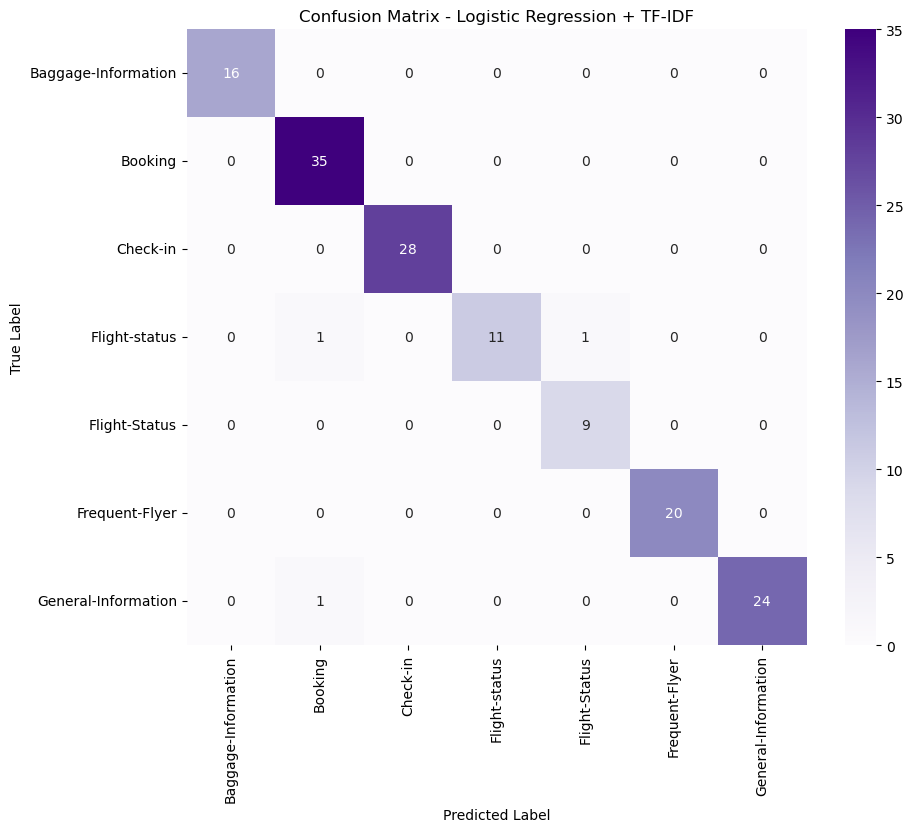

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(test_labels, logistic_regression_predictions)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='d', xticklabels=unique_intents, yticklabels=unique_intents)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression + TF-IDF')
plt.show()


<Figure size 1200x800 with 0 Axes>

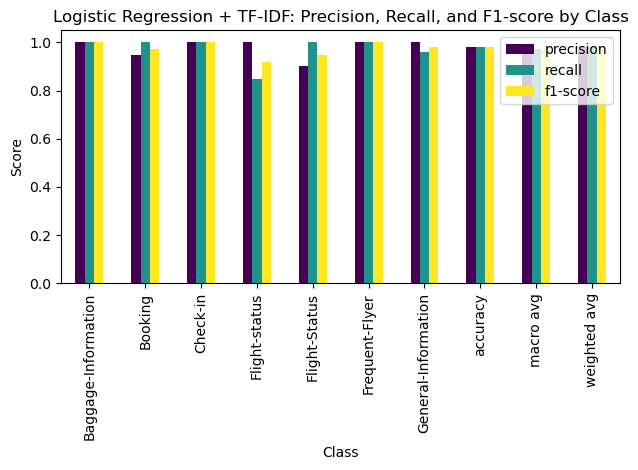

In [71]:
from sklearn.metrics import classification_report
import pandas as pd

# Get the classification report
report = classification_report(test_labels, logistic_regression_predictions, target_names=unique_intents, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score for each class
plt.figure(figsize=(12, 8))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', cmap='viridis')
plt.title('Logistic Regression + TF-IDF: Precision, Recall, and F1-score by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


# Final Thoughts

__Recommended model for Aurora Airlines to use for their mobile phone app, and why?__

Based on the results obtained from all the models trained in this assignment, I would recommend using the Logistic Regression model with TF-IDF vectorization for the company's mobile phone app. Here's why:

- __High Accuracy:__ The Logistic Regression model with TF-IDF achieved the highest accuracy among all the models, with an accuracy of 97.95%. This indicates that it can effectively classify user queries into the appropriate categories, providing accurate responses.

- __Consistent Performance Across Classes:__ The classification report for this model shows high precision, recall, and F1-score across all classes. It consistently performs well in identifying various intents, ensuring that users receive relevant and accurate information regardless of the query type.

- __Ease of Deployment:__ Unlike models such as TinyBERT and MobileBERT, which require the loading of large transformer models, Logistic Regression with TF-IDF is much easier to deploy. It does not require complex transformer architectures and can be loaded quickly, making it ideal for integration into a mobile app.

- __Efficiency:__ Logistic Regression models are computationally efficient and have low memory requirements, which is advantageous for a mobile app environment with limited computational resources. They can provide accurate predictions without the need for heavy computational resources or long inference times.

- __Scalability:__ TF-IDF vectorization is relatively scalable, allowing the model to handle a large number of features efficiently. This scalability is important as the app's user base grows.

- __Lower Complexity:__ Compared to more complex models like TinyBERT and MobileBERT, Logistic Regression with TF-IDF has lower complexity. This simplicity reduces the risk of overfitting, especially in scenarios with limited data.

- __Flexibility and Adaptability:__ Logistic Regression with TF-IDF has Limited flexibility and adaptability compared to BERT-based models. While TinyBERT offers flexibility in fine-tuning and adaptation to specific tasks and MobileBERT has a good balance between performance and efficiency, adaptable to various NLP tasks on mobile platforms.

While TinyBERT shows promising performance, logistic regression with TF-IDF outperformed all models in terms of accuracy, speed and ease of deployment. Additionally, TinyBERT and MobileBERT require the loading of large transformer models, which might be difficult in a mobile app environment. Therefore, considering both performance and ease of deployment, logistic regression with TF-IDF would be the recommended choice for the company's mobile phone app.


# Thank You!
# The End!